In [1]:
import os
import pandas as pd
import pickle

In [2]:
colPickle = open("./cols.pkl","rb")
importantColumns = pickle.load(colPickle)
importantColumns = importantColumns[2:]

In [3]:
Phone1Files = []
Phone2Files = []
NameMapping = dict()
for root, dirs, files in os.walk("./data"):
    for name in files:
        fpath = os.path.join(root, name)
        if name.find("Phone_1") != -1:
            Phone1Files.append(fpath)
        else:
            Phone2Files.append(fpath)

In [4]:
for i in range(len(Phone1Files)):
    phone1df = pd.read_csv(Phone1Files[i])
    phone1df.drop(phone1df.tail(8).index, inplace=True) #Removing aggregate Statistics
    dataToKeep = ["TIME_STAMP", "Event Technology","5G KPI PCell RF Frequency [MHz]","LTE KPI PCell Serving EARFCN(DL)",
                  "Smart Phone Smart Throughput Mobile Network UL Throughput [Mbps]", '5G KPI PCell RF Serving SS-RSRP [dBm]',
                  '5G KPI PCell RF Serving SS-RSRQ [dB]', "5G KPI PCell RF Serving PCI"]
    phone1df = phone1df[phone1df.columns.intersection(set(dataToKeep))]
    columns = phone1df.columns.values.tolist()
    if len(columns) != len(dataToKeep):
        for column in dataToKeep:
            if column not in columns:
                print("Adding column ", column)
                phone1df[column] = 0
    phone1df["TIME_STAMP"] = pd.to_datetime(phone1df["TIME_STAMP"])
    phone1df = phone1df.sort_values("TIME_STAMP")
    phone1df["Experiment"] = 0
    phone1df['Experiment'] = (phone1df['TIME_STAMP']
                    .transform(lambda x: x.diff().gt('1Sec').cumsum())
                    )
    if phone1df["Experiment"].max() == 29:
        phone1df[phone1df["Experiment"] < 5].to_csv('Phone1Static.csv', mode = 'a',header=not os.path.exists('Phone1Static.csv'))
        phone1df[(phone1df["Experiment"] >= 5) & (phone1df["Experiment"] < 10)].to_csv('Phone1Away.csv', mode = 'a',header=not os.path.exists('Phone1Away.csv'))
        phone1df[(phone1df["Experiment"] >= 10) & (phone1df["Experiment"] < 15)].to_csv('Phone1Ping.csv', mode = 'a',header=not os.path.exists('Phone1Ping.csv'))
        phone1df[phone1df["Experiment"] == 29].to_csv('Phone1PingMobility.csv', mode = 'a',header=not os.path.exists('Phone1PingMobility.csv'))
        phone1df[(phone1df["Experiment"] == 26) | (phone1df["Experiment"] == 25)].to_csv('Phone1Mobility.csv', mode = 'a',header=not os.path.exists('Phone1Mobility.csv'))
        phone1df.to_csv('phone1.csv', mode='a')


/tmp/ipykernel_2113/1109664228.py:2: DtypeWarning: Columns (186,189,190,197,223,236) have mixed types. Specify dtype option on import or set low_memory=False.
  phone1df = pd.read_csv(Phone1Files[i])
/tmp/ipykernel_2113/1109664228.py:2: DtypeWarning: Columns (186,189,190,197,223,236,240,243,244,251,276,280,283,284,291,314,317,318,325,338,351,355,358,359,366,388) have mixed types. Specify dtype option on import or set low_memory=False.
  phone1df = pd.read_csv(Phone1Files[i])
/tmp/ipykernel_2113/1109664228.py:2: DtypeWarning: Columns (29,30,31,100,104,144,145,146,186,189,190,197,223,236,241,248,263,270,285,292,307,314,329) have mixed types. Specify dtype option on import or set low_memory=False.
  phone1df = pd.read_csv(Phone1Files[i])
/tmp/ipykernel_2113/1109664228.py:2: DtypeWarning: Columns (186,189,190,197,223,236) have mixed types. Specify dtype option on import or set low_memory=False.
  phone1df = pd.read_csv(Phone1Files[i])
/tmp/ipykernel_2113/1109664228.py:2: DtypeWarning: Colu

Adding column  Smart Phone Smart Throughput Mobile Network UL Throughput [Mbps]


/tmp/ipykernel_2113/1109664228.py:2: DtypeWarning: Columns (95,111,113,115,124,140,235,238,239,246,272,285) have mixed types. Specify dtype option on import or set low_memory=False.
  phone1df = pd.read_csv(Phone1Files[i])
/tmp/ipykernel_2113/1109664228.py:2: DtypeWarning: Columns (29,30,31,144,145,146,186,189,190,197,223,236,240,243,244,251,264,277,281,284,285,292,305,316,319,320,327,352,356,359,360,367,389) have mixed types. Specify dtype option on import or set low_memory=False.
  phone1df = pd.read_csv(Phone1Files[i])
/tmp/ipykernel_2113/1109664228.py:2: DtypeWarning: Columns (186,189,190,197,223,236) have mixed types. Specify dtype option on import or set low_memory=False.
  phone1df = pd.read_csv(Phone1Files[i])
/tmp/ipykernel_2113/1109664228.py:2: DtypeWarning: Columns (29,144,145,146,186,189,190,197,223,236) have mixed types. Specify dtype option on import or set low_memory=False.
  phone1df = pd.read_csv(Phone1Files[i])
/tmp/ipykernel_2113/1109664228.py:2: DtypeWarning: Column

In [5]:
for i in range(len(Phone2Files)):
    phone2df = pd.read_csv(Phone2Files[i])
    phone2df.drop(phone2df.tail(8).index, inplace=True) #Removing aggregate Statistics
    phone2df = phone2df.filter(importantColumns)
    phone2df["TIME_STAMP"] = pd.to_datetime(phone2df["TIME_STAMP"])
    phone2df = phone2df.sort_values("TIME_STAMP")
    phone2df["Experiment"] = 0
    phone2df['Experiment'] = (phone2df['TIME_STAMP']
                    .transform(lambda x: x.diff().gt('1Sec').cumsum() + 30)
                    )
    if phone2df["Experiment"].max() == 41:
        phone2df.to_csv('phone2.csv', mode='a')

/tmp/ipykernel_612429/1344981687.py:2: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  phone2df = pd.read_csv(Phone2Files[i])
/tmp/ipykernel_612429/1344981687.py:2: DtypeWarning: Columns (29,30,31,144,145,146) have mixed types. Specify dtype option on import or set low_memory=False.
  phone2df = pd.read_csv(Phone2Files[i])
/tmp/ipykernel_612429/1344981687.py:2: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  phone2df = pd.read_csv(Phone2Files[i])
/tmp/ipykernel_612429/1344981687.py:2: DtypeWarning: Columns (169,170,177,197,210,215,222,231,238,247,254,263,270) have mixed types. Specify dtype option on import or set low_memory=False.
  phone2df = pd.read_csv(Phone2Files[i])
/tmp/ipykernel_612429/1344981687.py:2: DtypeWarning: Columns (30,93,100,103,104,108,116,144,145,146,153,154,174,181,186,189,190,197,223,236,240,243,250,262,265,272,284,287,294,306,309,316,317,318) have mixed t

In [1]:
import pandas as pd
import numpy as np
def GenerateGraph(location,title):
    iter_csv = pd.read_csv(location, iterator=True, chunksize=1000)
    df = pd.concat([chunk for chunk in iter_csv])
    df = df[["TIME_STAMP", "Event Technology","5G KPI PCell RF Frequency [MHz]","LTE KPI PCell Serving EARFCN(DL)","Smart Phone Smart Throughput Mobile Network UL Throughput [Mbps]"]]
    df['Event Technology'].ffill(inplace=True)
    df["5G KPI PCell RF Frequency [MHz]"].ffill(inplace=True)
    df["LTE KPI PCell Serving EARFCN(DL)"].ffill(inplace=True)
    df["Smart Phone Smart Throughput Mobile Network UL Throughput [Mbps]"].ffill(inplace=True)
    df = df[df["Smart Phone Smart Throughput Mobile Network UL Throughput [Mbps]"] > 0]
    df.dropna(subset = ['Event Technology'], inplace=True)

    count = {}
    LTEDict = {'1025': 1972.5,'2560' : 885, '2600': 889.00, '900' : 1960.00, '954' : 1965.40, '854' : 1955.40, '1001' : 1970.10,'1076' : 1977.60,'66611' : 2127.50, '804' : 1950.40,'1099' : 1979.90, '1100' : 1980.00, '1123' : 1982.30, '1125' : 1982.50, '1126' : 1982.60, '1148' : 1984.80, '1150' : 1985.00, '2000' : 2115.00, '2050' : 2120.00, '2125' : 2127.50, '2175' : 2132.50, '2200' : 2135.00, '2225' : 2137.50, '2300' : 2145.00, '2325' : 2147.50, '2460': 875.0,  '39750' : 2506.00, '39907' : 2521.70, '39948' : 2525.80, '40072' : 2538.20, '40384' : 2569.40, '40770' : 2608.00, '40810' : 2612.00, '41176' : 2648.60, '41238' : 2654.80, '41490' : 2680.00, '5035' : 731.50, '5090' : 737, '5095' : 737.50, '5110' : 739.00, '5330' : 763.00, '5780' : 739, '5815': 742.5, '66486': 2115.00, '66487' : 2115.10, '66536' : 2120.00, '66561' : 2122.5, '66586' : 2125, '66661' : 2132.50, '66686' : 2135, '66711' : 2137.50, '66736' : 2140.00, '66786' : 2145.00, '66811': 2147.5, '66836': 2150, '66886': 2150, '66911': 2150, '66961': 2150, '66986' : 2165.00, '67011': 2167.5, '675' : 1937.50, '676': 1937.6, '677': 1937.7, '68611': 619.5, '68636': 622, '68661': 624.5, '68686': 627, '68786': 637, '68836': 637, '68861': 637, '68886': 637, '68911': 649.5, '700' : 1940.00, '725': 1942.5, '750': 1942.5, '775': 1942.5, '801': 1950.1, '8115': 1937.5, '825': 1952.5, '8264': 1952.4, '8290': 1952.4, '8315': 1952.4, '8465': 1972.5, '850' : 1955.00, '851': 1955.1, '852': 1955.1, '8539': 1979.9, '8562': 1982.2, '8640': 1982.2, '8665': 1992.5, '875' : 1957.50, '876': 1957.6, '8763': 866.3, '877': 1957.7, '8950': 885, '901': 1960.1, '925' : 1962.50, '41305' : 2661.50, '66761' : 2142.50}
    
    import datetime as dt
    import math
    for index, row in df.iterrows():
        day = row["TIME_STAMP"][:10]
        if day not in count:
            count[day] = [0,0,0,0,0]
        if row["Event Technology"][:2] == '5G':
            frequency = float(row["5G KPI PCell RF Frequency [MHz]"])
            if frequency <= 1000:
                count[day][0] += 1
            elif frequency < 7000:
                count[day][1] += 1
            else:
                count[day][2] += 1
        else:
            number = float(row["LTE KPI PCell Serving EARFCN(DL)"])
            if math.isnan(number):
                print(number)
                continue
            frequency = LTEDict[str(int(number))]
            if  frequency < 1000:
                count[day][3] += 1
            else:
                count[day][4] += 1

    import matplotlib.pyplot as plt 

    lowBand = []
    midBand = []
    mmWave = []
    LTE = []
    LTEAdvanced = []
    Keys = []
    for key in sorted(count):
        total = float(sum(count[key]))
        Keys.append(key)
        lowBand.append(count[key][0]/total)
        midBand.append(count[key][1]/total)
        mmWave.append(count[key][2]/total)
        LTE.append(count[key][3]/total)
        LTEAdvanced.append(count[key][4]/total)
    
    
    lowBand = np.array(lowBand)
    midBand = np.array(midBand)
    mmWave = np.array(mmWave)
    LTE = np.array(LTE)
    LTEAdvanced = np.array(LTEAdvanced)
    fig,ax = plt.subplots(figsize=(20,6))
    plt.bar(Keys, mmWave, label = "mm Wave",linewidth=3)
    plt.bar(Keys, midBand, label = "Mid Band",linewidth=3, bottom = mmWave)
    plt.bar(Keys, lowBand, label = "Low Band",linewidth=3, bottom = mmWave + midBand)
    plt.bar(Keys, LTE, label = "LTE",linewidth=3, bottom = lowBand + midBand + mmWave)
    plt.bar(Keys, LTEAdvanced, label = "LTE Advanced",linewidth=3, bottom = lowBand + midBand+ mmWave + LTE)

    # customize the plot 
    ax.set_xlabel('Dates')
    ax.set_ylabel('Percentage of Technology')
    ax.set_title(f'{title} -- Date-wise Percentage of Technologies')
    plt.legend(loc="lower center",fontsize="10",bbox_to_anchor=(0.15, 0.2))
    ax.legend(title= 'Event Technology')
    plt.xticks(Keys, rotation=90)
    plt.show()

In [2]:
def GenerateGraphThroughput(location,title):
    iter_csv = pd.read_csv(location, iterator=True, chunksize=1000)
    df = pd.concat([chunk for chunk in iter_csv])
    df = df[["TIME_STAMP","Smart Phone Smart Throughput Mobile Network UL Throughput [Mbps]"]]
    
    # df["Smart Phone Smart Throughput Mobile Network UL Throughput [Mbps]"].ffill(inplace=True)
    df.dropna(subset = ["Smart Phone Smart Throughput Mobile Network UL Throughput [Mbps]"], inplace=True)

    df["TIME_STAMP"] = df["TIME_STAMP"].apply(lambda x: x[:10])
    df = df[["TIME_STAMP","Smart Phone Smart Throughput Mobile Network UL Throughput [Mbps]"]]
    df = df.groupby("TIME_STAMP",as_index=False).mean()
    
    import matplotlib.pyplot as plt
    fig,ax = plt.subplots(figsize=(20,6))
    plt.bar(df["TIME_STAMP"], df["Smart Phone Smart Throughput Mobile Network UL Throughput [Mbps]"],linewidth=3)

    # customize the plot 
    ax.set_xlabel('Dates')
    ax.set_ylabel('Mean Throughput [Mbps]')
    ax.set_title(f'{title} -- Date-wise Mean Throughput')
    plt.xticks(df["TIME_STAMP"], rotation=90)
    plt.show()


In [3]:
def GenerateGraphThroughputSmooth(location,title):
    iter_csv = pd.read_csv(location, iterator=True, chunksize=1000)
    df = pd.concat([chunk for chunk in iter_csv])
    df = df[["TIME_STAMP","Smart Phone Smart Throughput Mobile Network UL Throughput [Mbps]"]]
    
    # df["Smart Phone Smart Throughput Mobile Network UL Throughput [Mbps]"].ffill(inplace=True)
    df.dropna(subset = ["Smart Phone Smart Throughput Mobile Network UL Throughput [Mbps]"], inplace=True)

    df["TIME_STAMP"] = df["TIME_STAMP"].apply(lambda x: x[:10])
    df = df[["TIME_STAMP","Smart Phone Smart Throughput Mobile Network UL Throughput [Mbps]"]]
    df = df.groupby("TIME_STAMP",as_index=False).mean()
    df = df[df["Smart Phone Smart Throughput Mobile Network UL Throughput [Mbps]"] > 0]

    df["Throughput Smoothed"] = df["Smart Phone Smart Throughput Mobile Network UL Throughput [Mbps]"].rolling(window=3).mean()
    df = df[df["Throughput Smoothed"] > 0]
    import matplotlib.pyplot as plt
    fig,ax = plt.subplots(figsize=(20,6))
    plt.bar(df["TIME_STAMP"], df["Throughput Smoothed"],linewidth=3)

    # customize the plot 
    ax.set_xlabel('Dates')
    ax.set_ylabel('Mean Throughput [Mbps]')
    ax.set_title(f'{title} -- Date-wise Mean Throughput')
    plt.xticks(df["TIME_STAMP"], rotation=90)
    plt.show()


In [4]:
def GenerateGraphThroughputScatter(location,title):
    iter_csv = pd.read_csv(location, iterator=True, chunksize=1000)
    df = pd.concat([chunk for chunk in iter_csv])
    df = df[["TIME_STAMP","Smart Phone Smart Throughput Mobile Network UL Throughput [Mbps]", "Experiment"]]
    
    # df["Smart Phone Smart Throughput Mobile Network UL Throughput [Mbps]"].ffill(inplace=True)
    df.dropna(subset = ["Smart Phone Smart Throughput Mobile Network UL Throughput [Mbps]"], inplace=True)

    df["TIME_STAMP"] = df["TIME_STAMP"].apply(lambda x: x[:10])
    df = df.groupby(["TIME_STAMP","Experiment"],as_index=False).mean()
    import matplotlib.pyplot as plt
    fig,ax = plt.subplots(figsize=(20,6))
    plt.grid()
    experiments = df["Experiment"].unique()
    startExp = min(experiments)
    for experiment in experiments:
        dfExp = df[df["Experiment"] == experiment]
        plt.scatter(dfExp["TIME_STAMP"], dfExp["Smart Phone Smart Throughput Mobile Network UL Throughput [Mbps]"], label = 'Run: ' + str(experiment-startExp))
    plt.legend(loc="lower left",fontsize="10")
    # customize the plot 
    ax.set_axisbelow(True)
    ax.set_xlabel('Dates')
    ax.set_ylabel('Mean Throughput [Mbps]')
    ax.set_title(f'{title} -- Date-wise Mean Throughput')
    
    plt.xticks(df["TIME_STAMP"], rotation=90)
    plt.show()

In [13]:
def GenerateGraphThroughputScatterRSRP(location,title):
    iter_csv = pd.read_csv(location, iterator=True, chunksize=1000)
    df = pd.concat([chunk for chunk in iter_csv])
    df = df[["TIME_STAMP","Smart Phone Smart Throughput Mobile Network UL Throughput [Mbps]", "Experiment","5G KPI PCell RF Serving SS-RSRP [dBm]"]]
    
    # df["Smart Phone Smart Throughput Mobile Network UL Throughput [Mbps]"].ffill(inplace=True)
    df.dropna(subset = ["Smart Phone Smart Throughput Mobile Network UL Throughput [Mbps]"], inplace=True)
    df.dropna(subset = ["Smart Phone Smart Throughput Mobile Network UL Throughput [Mbps]"], inplace=True)

    df["TIME_STAMP"] = df["TIME_STAMP"].apply(lambda x: x[:10])
    dfT = df.groupby(["TIME_STAMP","Experiment"],as_index=False).mean()
    import matplotlib.pyplot as plt
    fig, (ax1, ax2) = plt.subplots(2, 1, layout='constrained', figsize = (20,15))
    experiments = dfT["Experiment"].unique()
    startExp = min(experiments)
    for experiment in experiments:
        dfExp = dfT[dfT["Experiment"] == experiment]
        ax1.scatter(dfExp["TIME_STAMP"], dfExp["Smart Phone Smart Throughput Mobile Network UL Throughput [Mbps]"], label = 'Run: ' + str(experiment-startExp))
    # ax1.legend(loc="lower left",fontsize="10")
    # customize the plot 
    ax1.set_axisbelow(True)
    ax1.set_xlabel('Dates')
    ax1.set_ylabel('Mean Throughput [Mbps]')
    ax1.set_title(f'{title} -- Date-wise Mean Throughput')
    ax1.grid(b = True)
    ax1.set_xticklabels(dfExp["TIME_STAMP"], rotation=90)
    ax1.legend(fontsize = 12)
    # plt.show()

    dfR = df
    dfR["RSRPexp"] = df["5G KPI PCell RF Serving SS-RSRP [dBm]"].apply(lambda x: np.power(10,x))
    dfR = dfR.groupby(["TIME_STAMP", "Experiment"], as_index=False).mean()
    dfR["RSRP"] = dfR["RSRPexp"].apply(lambda x: np.log10(x))
    experiments = dfR["Experiment"].unique()
    startExp = min(experiments)
    for experiment in experiments:
        dfExp = dfR[dfR["Experiment"] == experiment]
        ax2.scatter(dfExp["TIME_STAMP"], dfExp["RSRP"], label = 'Run: ' + str(experiment-startExp))
    # ax2.legend(loc="lower left",fontsize="10")
    # customize the plot 
    ax2.set_axisbelow(True)
    ax2.set_xlabel('Dates')
    ax2.set_ylabel('RSRP [dB]')
    ax2.set_title(f'{title} -- Date-wise Mean RSRP')
    ax2.set_xticklabels(dfExp["TIME_STAMP"], rotation=90)
    ax2.grid(b = True)
    ax2.legend(fontsize = 12)
    plt.show()


In [21]:
def GenerateGraphThroughputScatterRSRQ(location,title):
    iter_csv = pd.read_csv(location, iterator=True, chunksize=1000)
    df = pd.concat([chunk for chunk in iter_csv])
    df = df[["TIME_STAMP","Smart Phone Smart Throughput Mobile Network UL Throughput [Mbps]", "Experiment","5G KPI PCell RF Serving SS-RSRQ [dB]"]]
    
    # df["Smart Phone Smart Throughput Mobile Network UL Throughput [Mbps]"].ffill(inplace=True)
    df.dropna(subset = ["Smart Phone Smart Throughput Mobile Network UL Throughput [Mbps]"], inplace=True)
    df.dropna(subset = ["Smart Phone Smart Throughput Mobile Network UL Throughput [Mbps]"], inplace=True)

    df["TIME_STAMP"] = df["TIME_STAMP"].apply(lambda x: x[:10])
    dfT = df.groupby(["TIME_STAMP","Experiment"],as_index=False).mean()
    import matplotlib.pyplot as plt
    fig, (ax1, ax2) = plt.subplots(2, 1, layout='constrained', figsize = (20,15))
    experiments = dfT["Experiment"].unique()
    startExp = min(experiments)
    for experiment in experiments:
        dfExp = dfT[dfT["Experiment"] == experiment]
        ax1.scatter(dfExp["TIME_STAMP"], dfExp["Smart Phone Smart Throughput Mobile Network UL Throughput [Mbps]"], label = 'Run: ' + str(experiment-startExp))
    # ax1.legend(loc="lower left",fontsize="10")
    # customize the plot 
    ax1.set_axisbelow(True)
    ax1.set_xlabel('Dates')
    ax1.set_ylabel('Mean Throughput [Mbps]')
    ax1.set_title(f'{title} -- Date-wise Mean Throughput')
    ax1.grid(b = True)
    ax1.set_xticklabels(dfExp["TIME_STAMP"], rotation=90)
    ax1.legend(fontsize = 12)
    # plt.show()

    dfR = df
    dfR["RSRQexp"] = df["5G KPI PCell RF Serving SS-RSRQ [dB]"].apply(lambda x: np.power(10,x))
    dfR = dfR.groupby(["TIME_STAMP", "Experiment"], as_index=False).mean()
    dfR["RSRQ"] = dfR["RSRQexp"].apply(lambda x: np.log10(x))
    # dfR = dfR[dfR["RSRQ"] > -12]
    experiments = dfR["Experiment"].unique()
    startExp = min(experiments)
    for experiment in experiments:
        dfExp = dfR[dfR["Experiment"] == experiment]
        ax2.scatter(dfExp["TIME_STAMP"], dfExp["RSRQ"], label = 'Run: ' + str(experiment-startExp))
    # ax2.legend(loc="lower left",fontsize="10")
    # customize the plot 
    ax2.set_axisbelow(True)
    ax2.set_xlabel('Dates')
    ax2.set_ylabel('RSRP [dB]')
    ax2.set_title(f'{title} -- Date-wise Mean RSRQ')
    ax2.set_xticklabels(dfExp["TIME_STAMP"], rotation=90)
    ax2.grid(b = True)
    ax2.legend(fontsize = 12)
    plt.show()

In [39]:
import pandas as pd
import numpy as np
def GenerateGraphPCI(location,title):
    iter_csv = pd.read_csv(location, iterator=True, chunksize=1000)
    df = pd.concat([chunk for chunk in iter_csv])
    df = df[["5G KPI PCell RF Serving PCI","TIME_STAMP","Smart Phone Smart Throughput Mobile Network UL Throughput [Mbps]", "Experiment"]]
    
    df["Smart Phone Smart Throughput Mobile Network UL Throughput [Mbps]"].ffill(inplace=True)
    df["5G KPI PCell RF Serving PCI"].ffill(inplace=True)
    df.dropna(subset = ["5G KPI PCell RF Serving PCI"], inplace=True)

    df["TIME_STAMP"] = df["TIME_STAMP"].apply(lambda x: x[:10])
    dfT = df.groupby(["TIME_STAMP","Experiment"],as_index=False).mean()
    import matplotlib.pyplot as plt
    fig, (ax1, ax2) = plt.subplots(2, 1, layout='constrained', figsize = (20,15))
    experiments = dfT["Experiment"].unique()
    startExp = min(experiments)
    for experiment in experiments:
        dfExp = dfT[dfT["Experiment"] == experiment]
        ax1.scatter(dfExp["TIME_STAMP"], dfExp["Smart Phone Smart Throughput Mobile Network UL Throughput [Mbps]"], label = 'Run: ' + str(experiment-startExp))
    # ax1.legend(loc="lower left",fontsize="10")
    # customize the plot 
    ax1.set_axisbelow(True)
    ax1.set_xlabel('Dates')
    ax1.set_ylabel('Mean Throughput [Mbps]')
    ax1.set_title(f'{title} -- Date-wise Mean Throughput')
    ax1.grid(b = True)
    ax1.set_xticklabels(dfExp["TIME_STAMP"], rotation=90)
    ax1.legend(fontsize = 12)
    # plt.show()

    iter_csv = pd.read_csv(location, iterator=True, chunksize=1000)
    df = pd.concat([chunk for chunk in iter_csv])
    df = df[["5G KPI PCell RF Serving PCI","TIME_STAMP", ]]
    df["5G KPI PCell RF Serving PCI"].ffill(inplace=True)
    df.dropna(subset = ["5G KPI PCell RF Serving PCI"], inplace=True)

    import datetime as dt
    import math

    TotalCounts = {}
    PCICounts = {}
    for index, row in df.iterrows():
        day = row["TIME_STAMP"][:10]
        pci = row["5G KPI PCell RF Serving PCI"]
        if pci not in PCICounts:
            PCICounts[pci] = {}
        if day not in TotalCounts:
            TotalCounts[day] = 0
        if day not in PCICounts[pci]:
            PCICounts[pci][day] = 0
        TotalCounts[day] += 1
        PCICounts[pci][day] += 1
    

    Keys = sorted(list(TotalCounts.keys()))
    import matplotlib.pyplot as plt 
    
    temp = []
    for date in Keys:
        temp.append(TotalCounts[date])
    totalCounts = np.array(temp)

    previousSum = np.zeros(len(Keys))
    for pci in PCICounts.keys():
        data = []
        for date in Keys:
            if date in PCICounts[pci]:
                data.append(PCICounts[pci][date])
            else:
                data.append(0)
        data = np.array(data)
        data = data/totalCounts
        plt.bar(Keys, data, label = str(pci) ,linewidth=3, bottom = previousSum)
        previousSum += data
    
    # customize the plot 
    ax2.set_xlabel('Dates')
    ax2.set_ylabel('Percentage of PCI')
    ax2.set_title(f'{title} -- Date-wise Percentage of PCIs')
    ax2.legend(title= 'PCI')
    ax2.set_xticklabels(Keys, rotation=90)
    plt.show()

In [28]:
def GeneratePCIThroughput(location,title):
    iter_csv = pd.read_csv(location, iterator=True, chunksize=1000)
    df = pd.concat([chunk for chunk in iter_csv])
    df = df[["5G KPI PCell RF Serving PCI","TIME_STAMP","Smart Phone Smart Throughput Mobile Network UL Throughput [Mbps]", "Experiment"]]
    
    df["Smart Phone Smart Throughput Mobile Network UL Throughput [Mbps]"].ffill(inplace=True)
    df["5G KPI PCell RF Serving PCI"].ffill(inplace=True)
    df.dropna(subset = ["5G KPI PCell RF Serving PCI"], inplace=True)

    df["TIME_STAMP"] = df["TIME_STAMP"].apply(lambda x: x[:10])
    dfT = df.groupby(["TIME_STAMP","Experiment"],as_index=False).mean()
    import matplotlib.pyplot as plt
    fig, (ax1, ax2) = plt.subplots(2, 1, layout='constrained', figsize = (20,15))
    experiments = dfT["Experiment"].unique()
    startExp = min(experiments)
    for experiment in experiments:
        dfExp = dfT[dfT["Experiment"] == experiment]
        ax1.scatter(dfExp["TIME_STAMP"], dfExp["Smart Phone Smart Throughput Mobile Network UL Throughput [Mbps]"], label = 'Run: ' + str(experiment-startExp))
    # ax1.legend(loc="lower left",fontsize="10")
    # customize the plot 
    ax1.set_axisbelow(True)
    ax1.set_xlabel('Dates')
    ax1.set_ylabel('Mean Throughput [Mbps]')
    ax1.set_title(f'{title} -- Date-wise Mean Throughput')
    ax1.grid(b = True)
    ax1.set_xticklabels(dfExp["TIME_STAMP"], rotation=90)
    ax1.legend(fontsize = 12)
    # plt.show()

    dfR = df
    dfR.sort_values(by = ["TIME_STAMP"], ascending=True, inplace=True)
    startExp = min(experiments)
    for experiment in experiments:
        x = []
        y = []
        for day in dfR["TIME_STAMP"].unique():
            x.append(day)
            PCIS = dfR[(dfR["TIME_STAMP"] == day) & (dfR["Experiment"] == experiment)]["5G KPI PCell RF Serving PCI"].unique()
            y.append(len(PCIS))
        ax2.scatter(x, y, label = 'Run: ' + str(experiment-startExp))
    # ax2.legend(loc="lower left",fontsize="10")
    # customize the plot 
    ax2.set_axisbelow(True)
    ax2.set_xlabel('Dates')
    ax2.set_ylabel('PCI Count')
    ax2.set_title(f'{title} -- PCI Count')
    ax2.set_xticklabels(dfExp["TIME_STAMP"], rotation=90)
    ax2.grid(b = True)
    ax2.legend(fontsize = 12)
    plt.show()

/tmp/ipykernel_46634/38667571.py:25: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b = True)
/tmp/ipykernel_46634/38667571.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(dfExp["TIME_STAMP"], rotation=90)
/tmp/ipykernel_46634/38667571.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(dfExp["TIME_STAMP"], rotation=90)
/tmp/ipykernel_46634/38667571.py:48: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b = True)


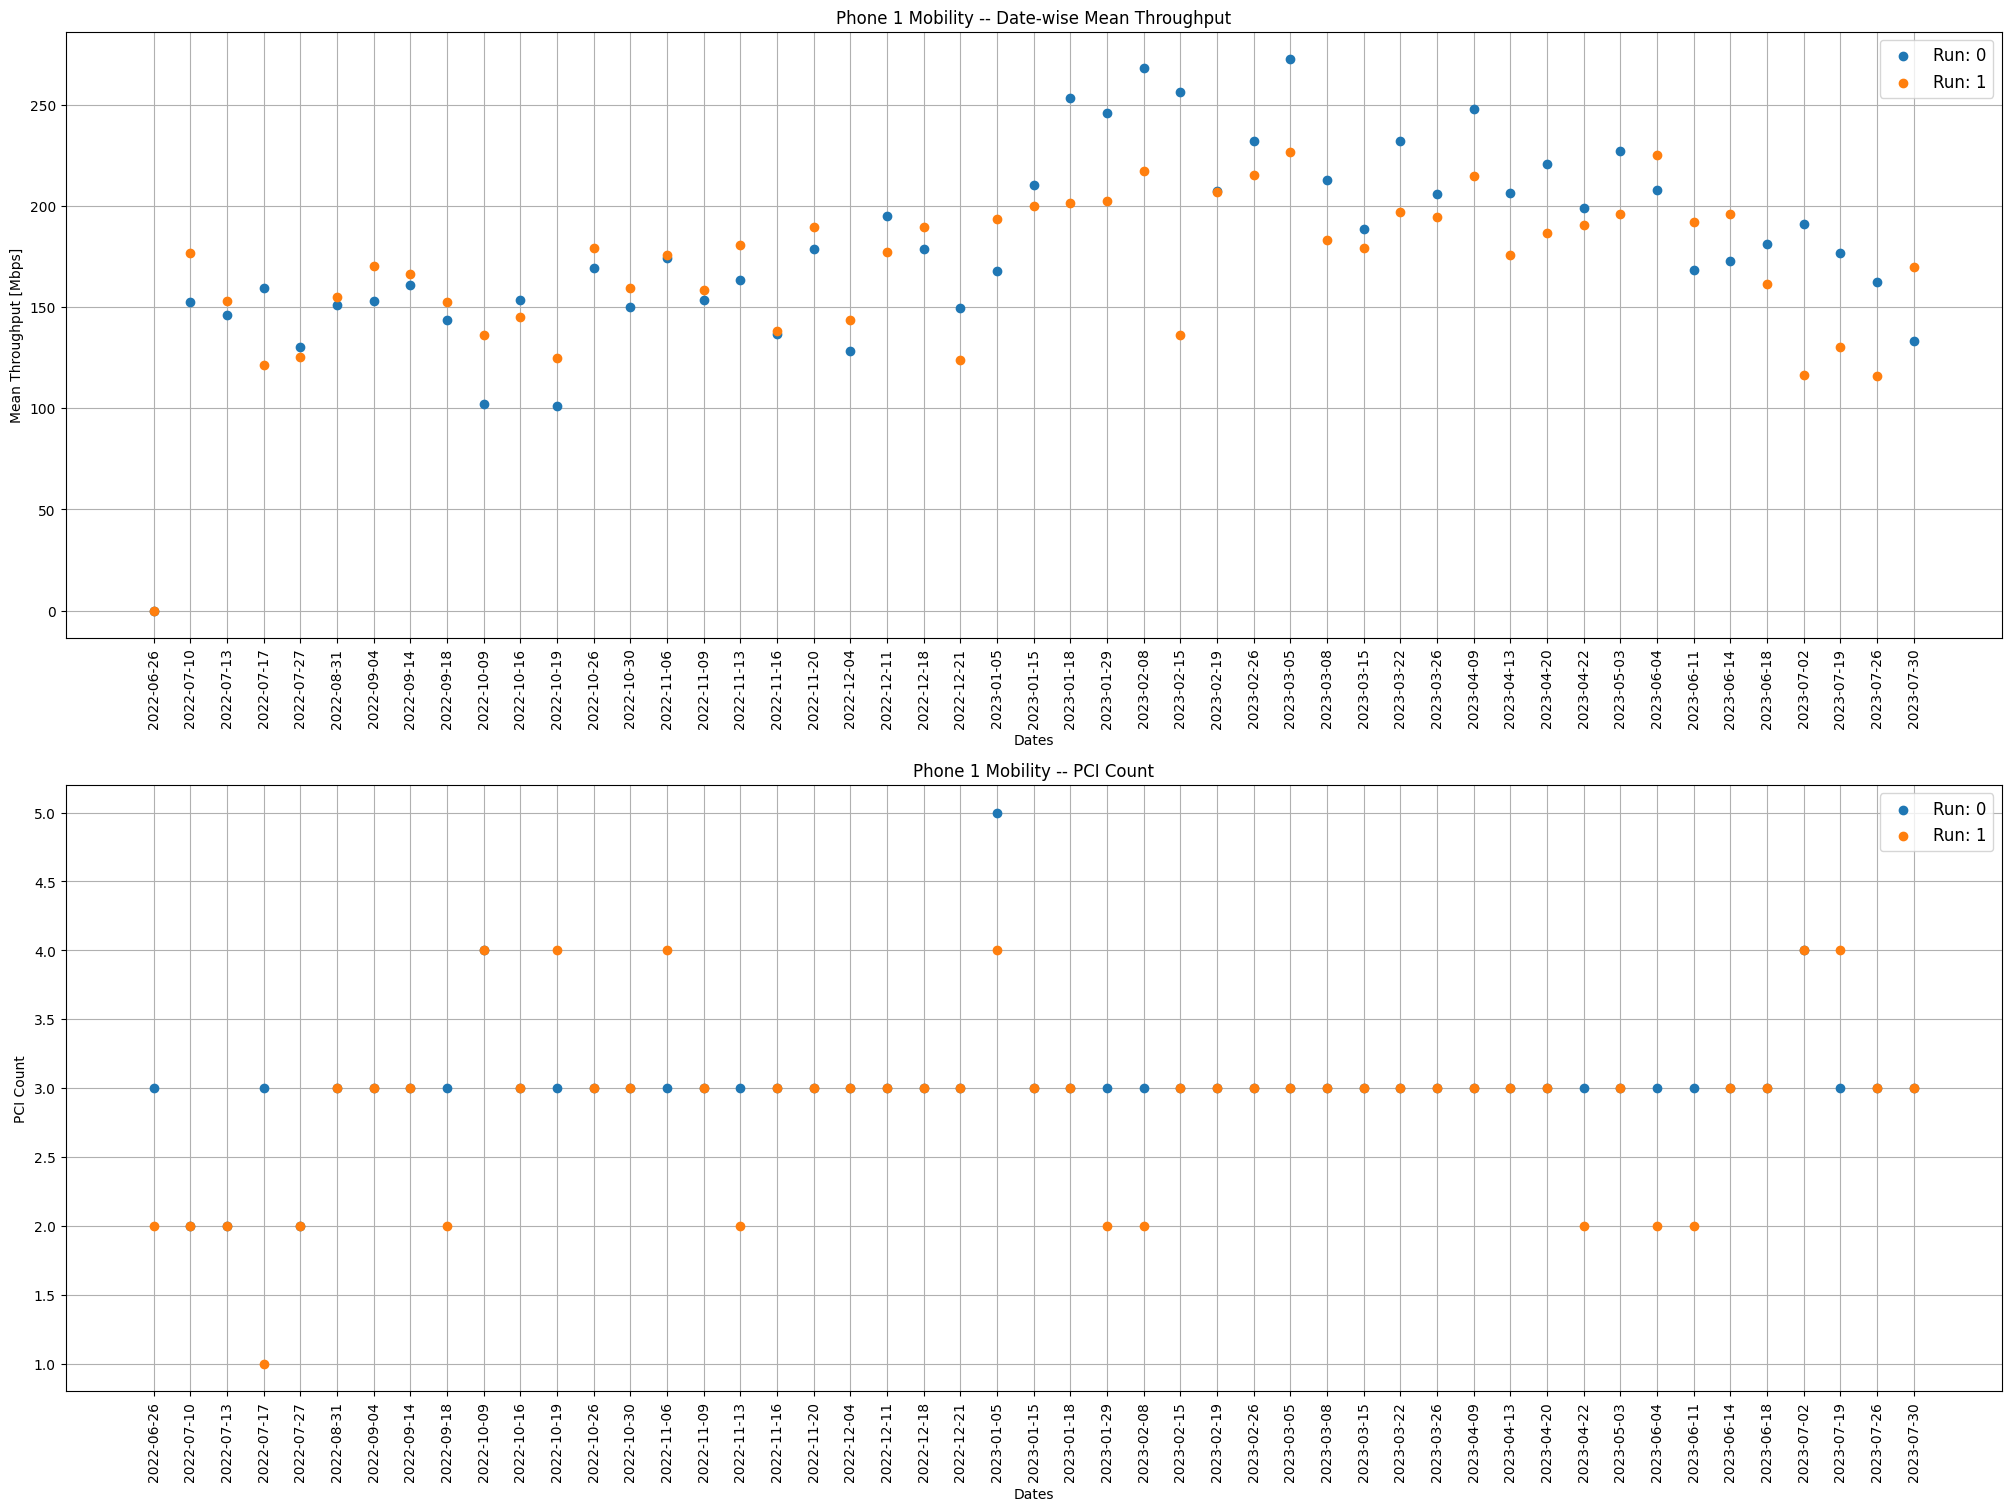

In [29]:
GeneratePCIThroughput("Phone1Mobility.csv", "Phone 1 Mobility")

/tmp/ipykernel_46634/1049631699.py:27: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b = True)
/tmp/ipykernel_46634/1049631699.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(dfExp["TIME_STAMP"], rotation=90)
/tmp/ipykernel_46634/1049631699.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(Keys, rotation=90)


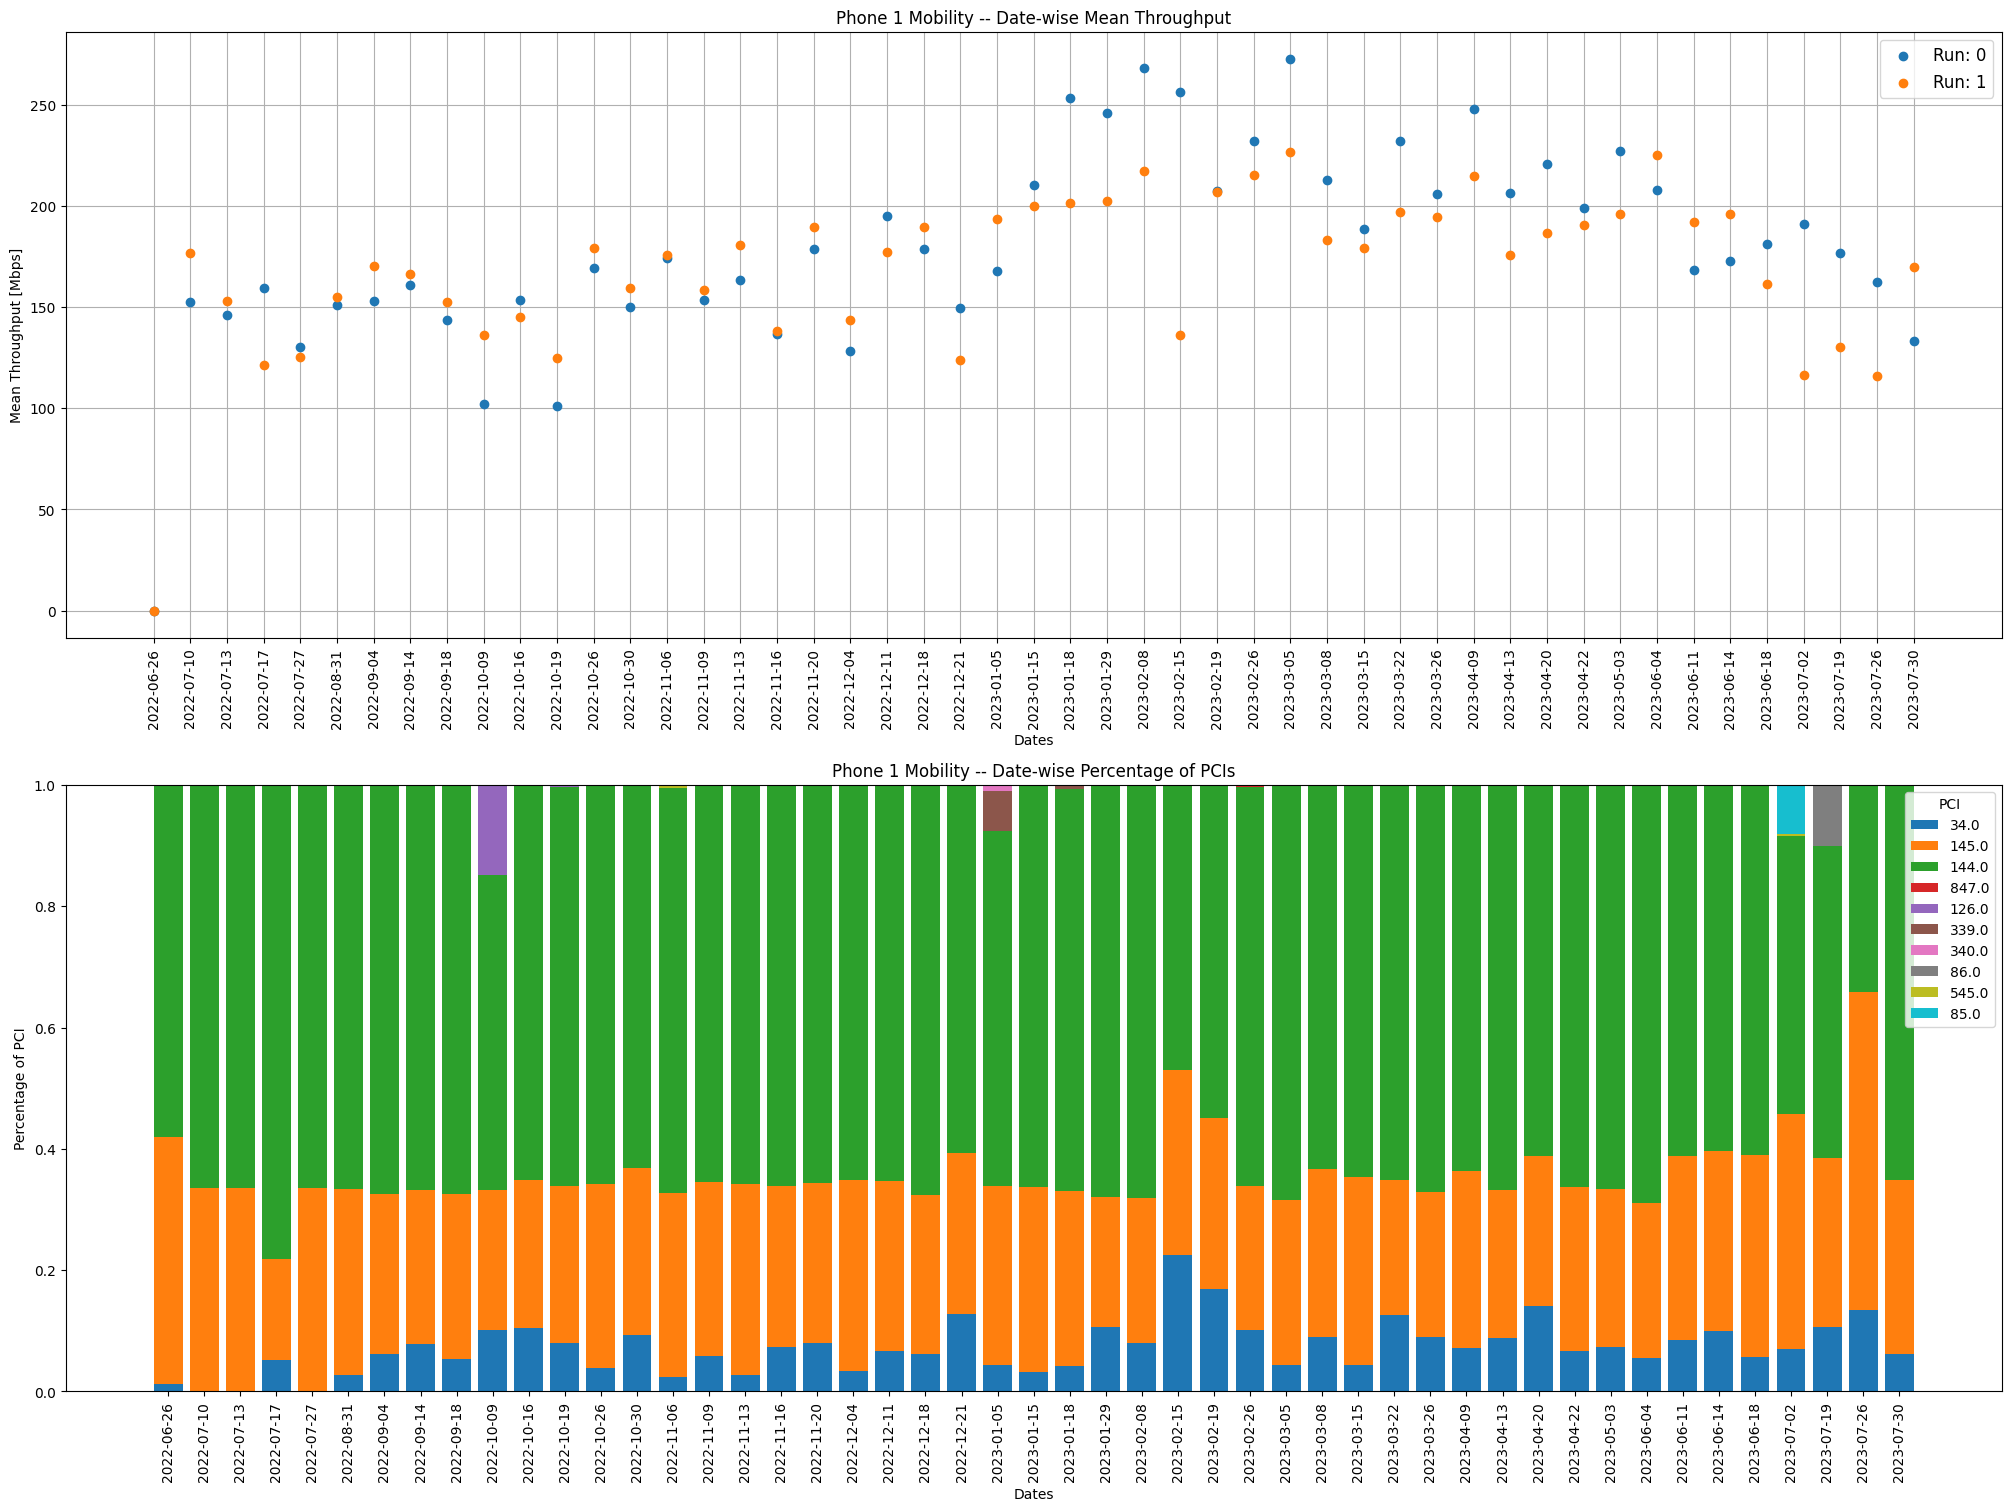

In [40]:
GenerateGraphPCI("Phone1Mobility.csv", "Phone 1 Mobility")

/tmp/ipykernel_1007188/1459905543.py:25: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b = True)
/tmp/ipykernel_1007188/1459905543.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(dfExp["TIME_STAMP"], rotation=90)
/tmp/ipykernel_1007188/1459905543.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(dfExp["TIME_STAMP"], rotation=90)
/tmp/ipykernel_1007188/1459905543.py:46: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b = True)


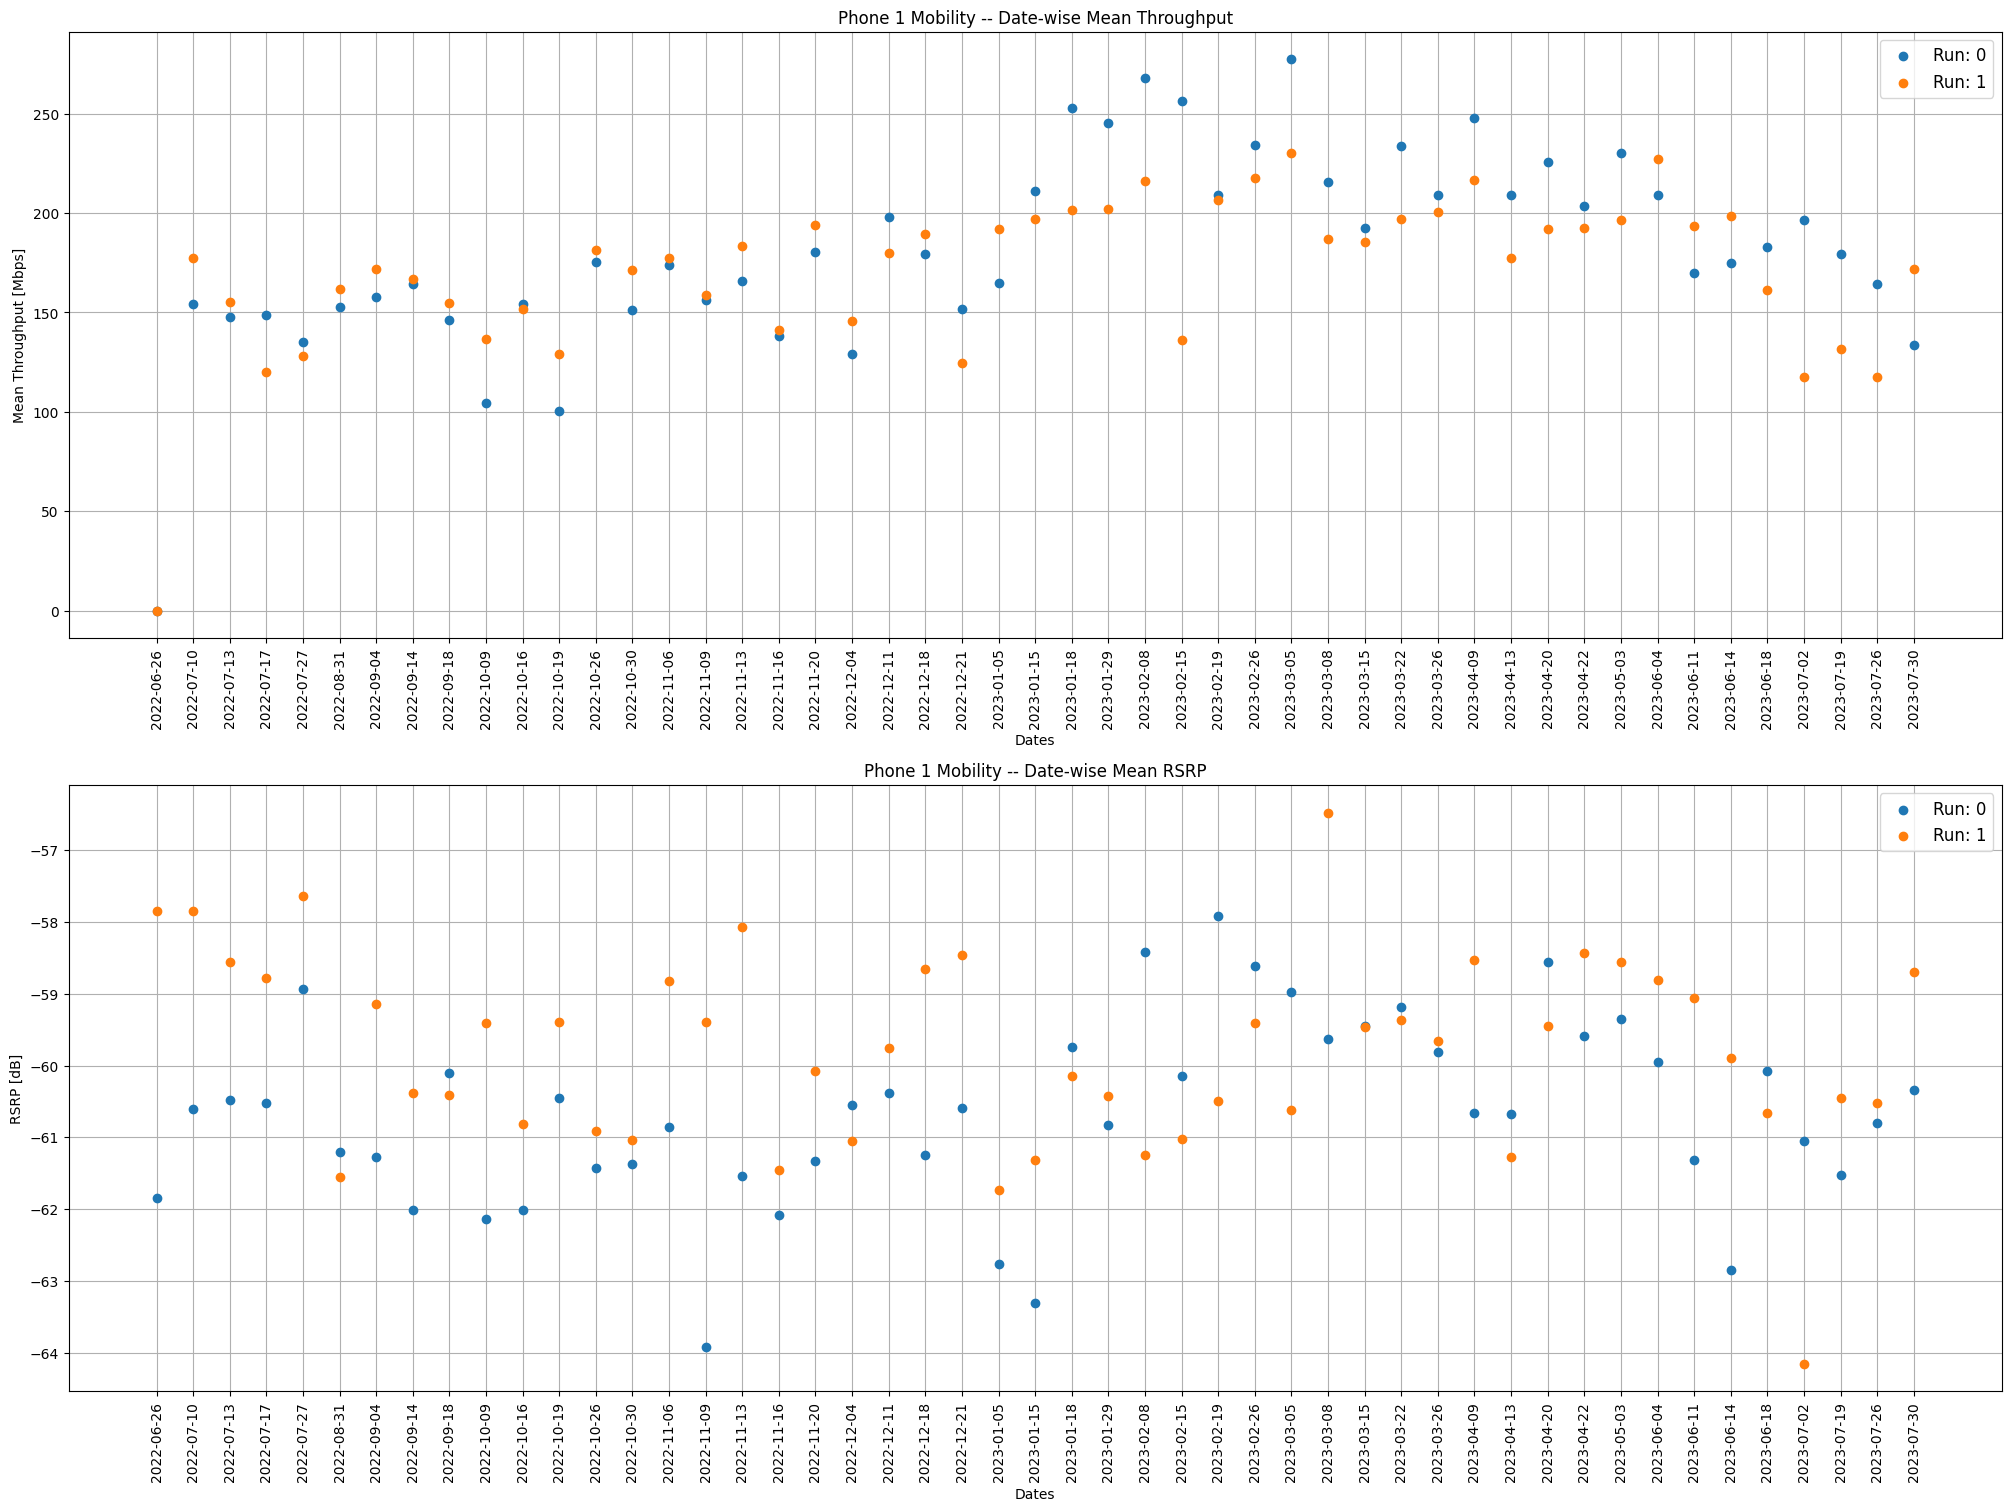

In [22]:
GenerateGraphThroughputScatterRSRP("Phone1Mobility.csv", "Phone 1 Mobility")

/tmp/ipykernel_1007188/3039753332.py:25: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b = True)
/tmp/ipykernel_1007188/3039753332.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(dfExp["TIME_STAMP"], rotation=90)
/tmp/ipykernel_1007188/3039753332.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(dfExp["TIME_STAMP"], rotation=90)
/tmp/ipykernel_1007188/3039753332.py:47: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b = True)


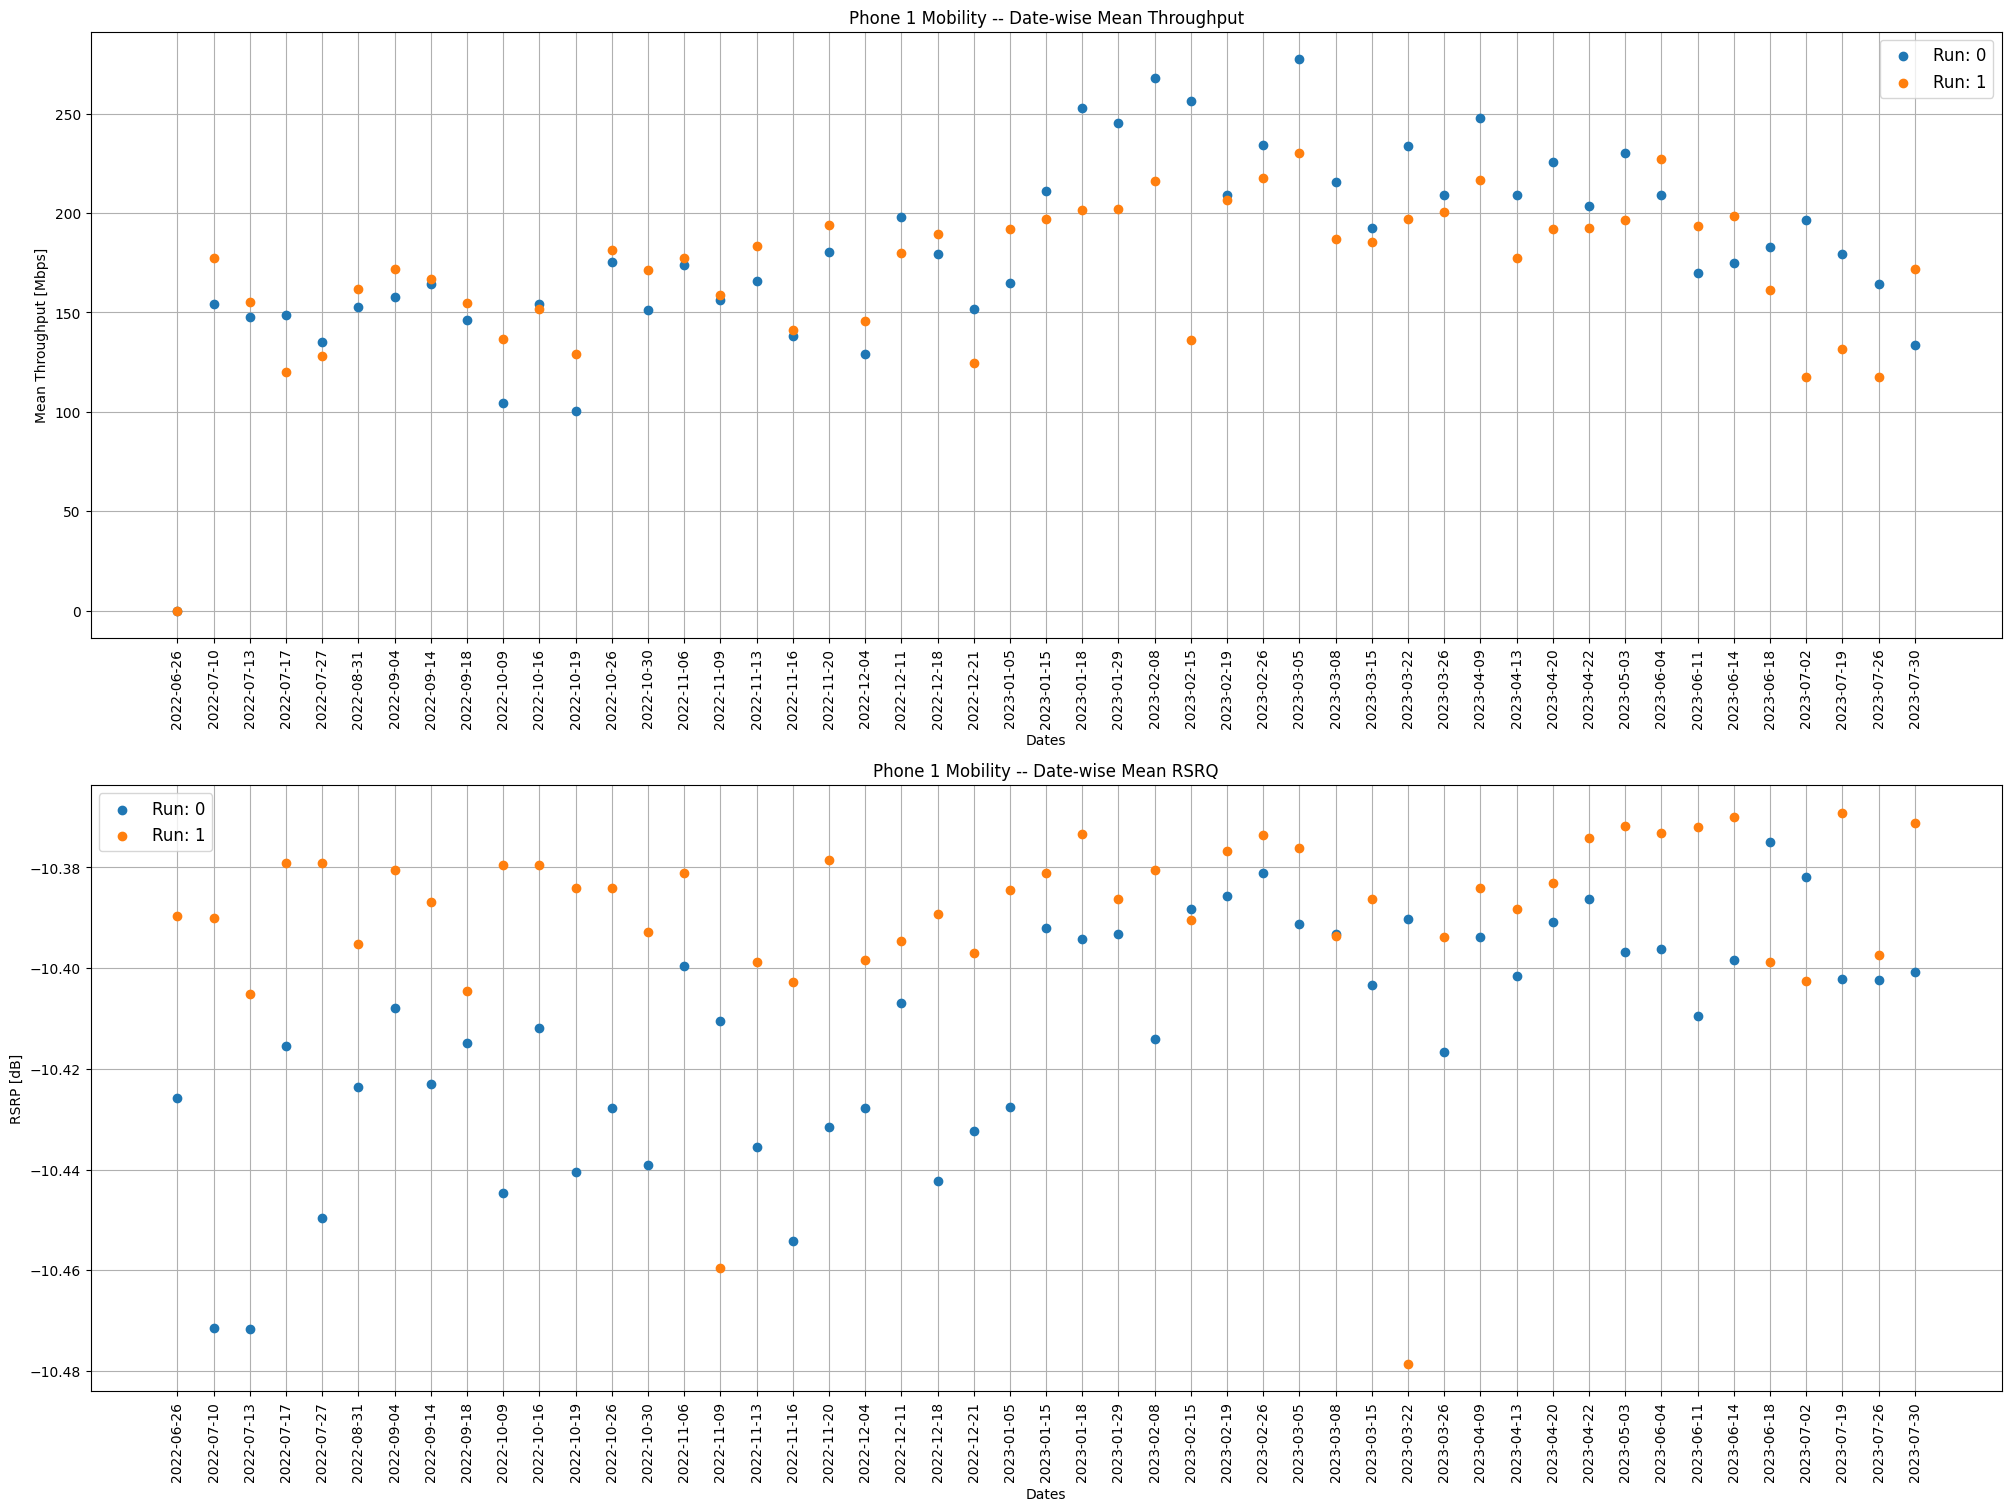

In [23]:
GenerateGraphThroughputScatterRSRQ("Phone1Mobility.csv", "Phone 1 Mobility")

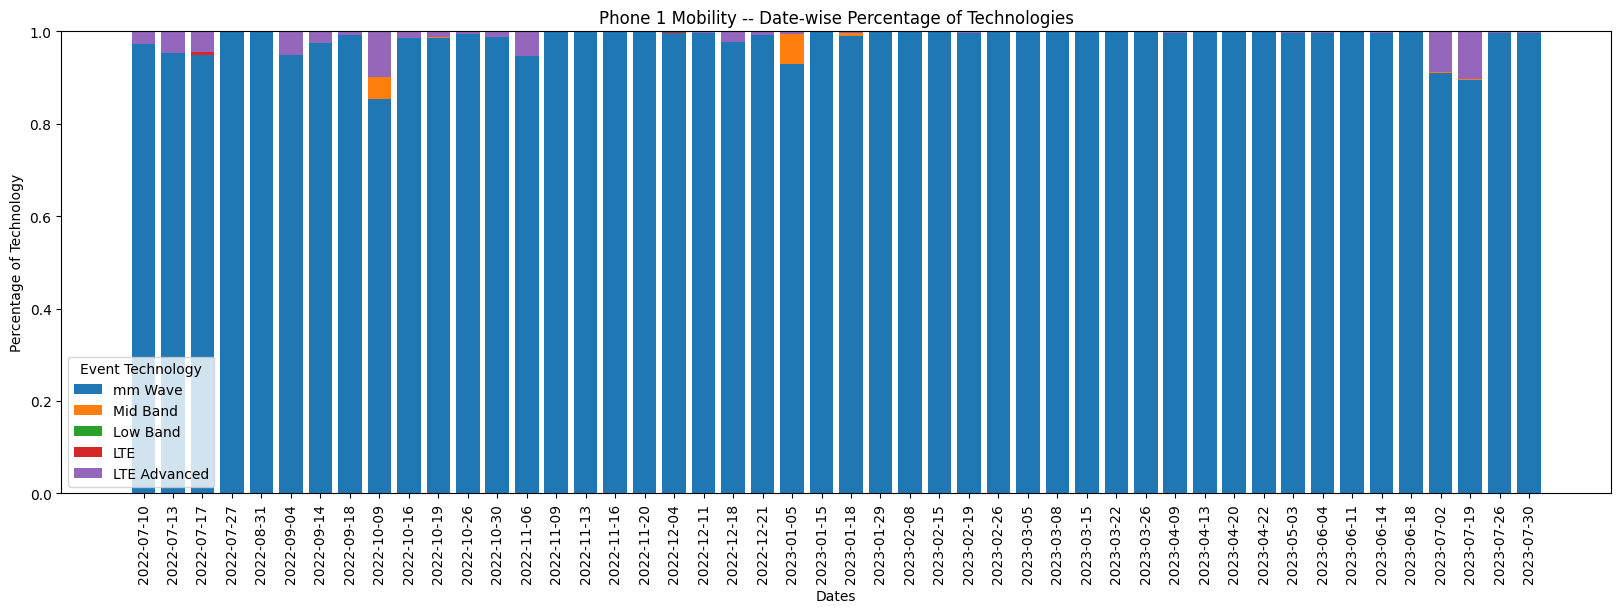

In [69]:
GenerateGraph("Phone1Mobility.csv", "Phone 1 Mobility")

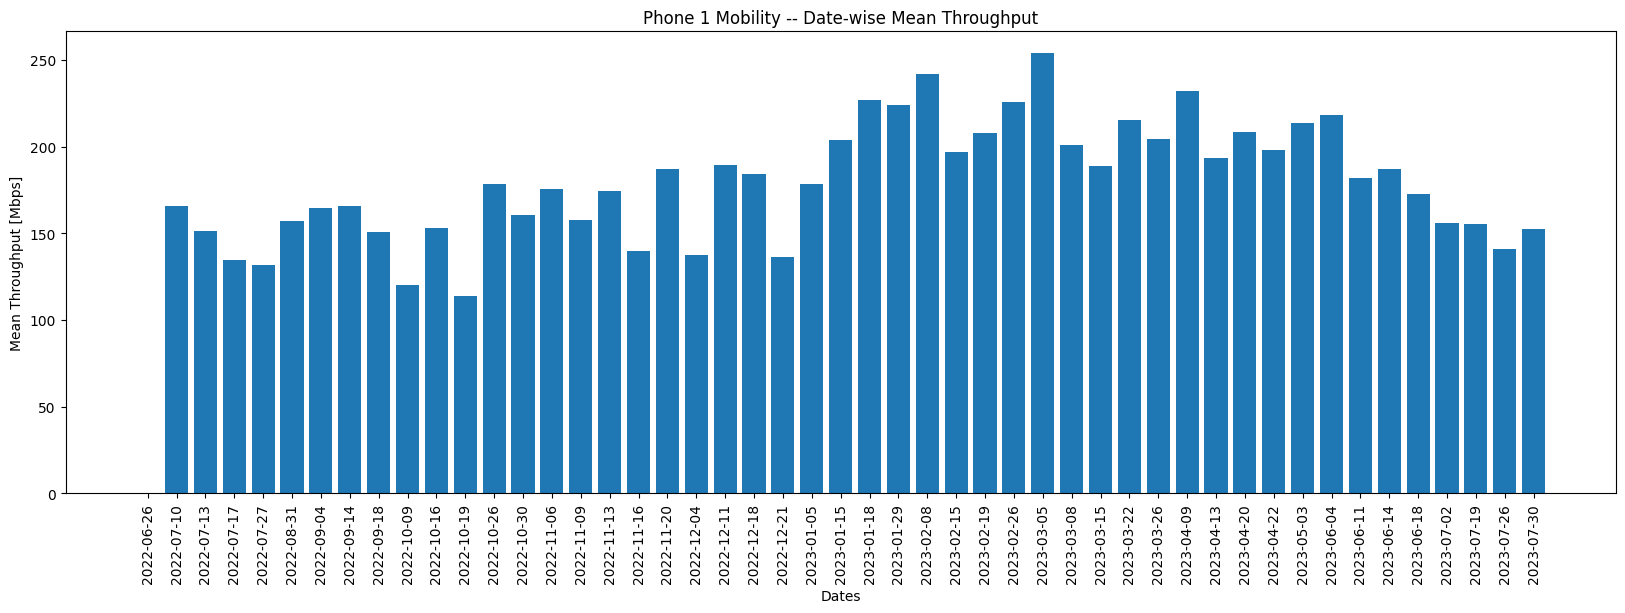

In [70]:
GenerateGraphThroughput("Phone1Mobility.csv", "Phone 1 Mobility")

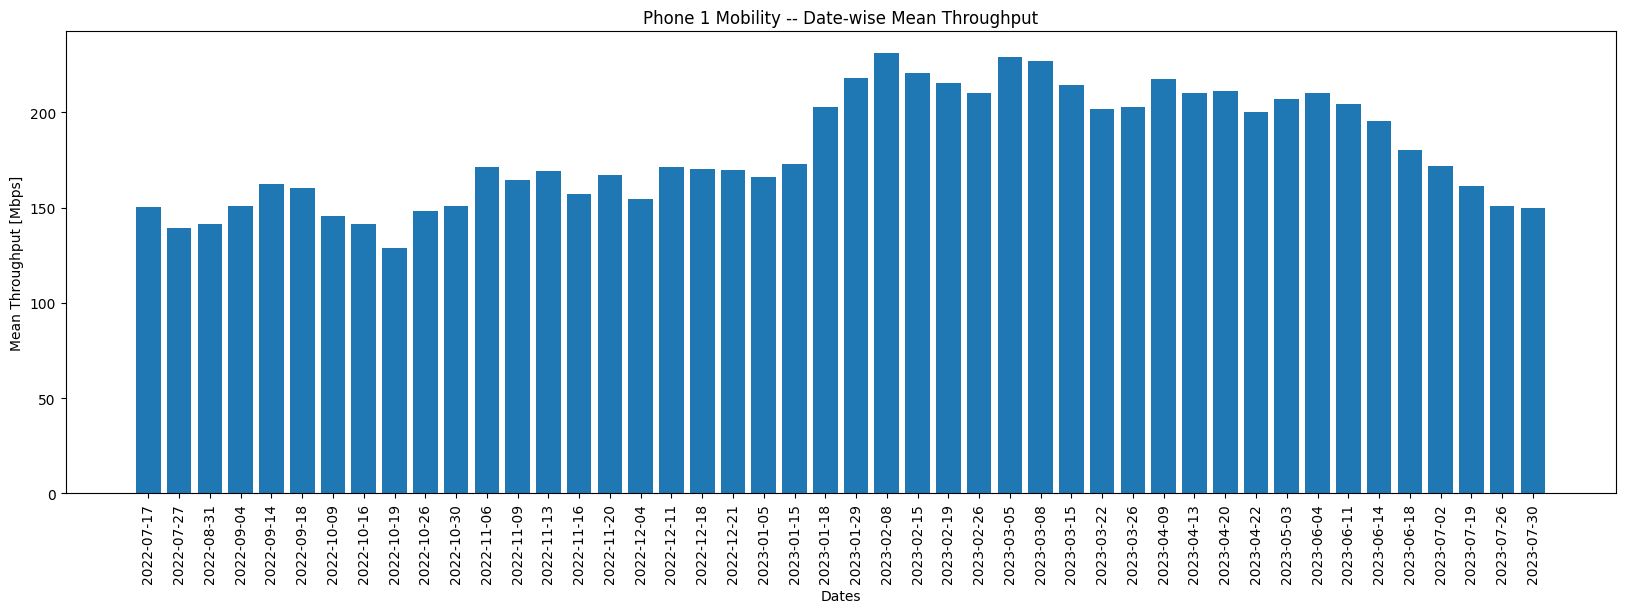

In [28]:
GenerateGraphThroughputSmooth("Phone1Mobility.csv", "Phone 1 Mobility")

/tmp/ipykernel_46634/38667571.py:25: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b = True)
/tmp/ipykernel_46634/38667571.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(dfExp["TIME_STAMP"], rotation=90)
/tmp/ipykernel_46634/38667571.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(dfExp["TIME_STAMP"], rotation=90)
/tmp/ipykernel_46634/38667571.py:48: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b = True)


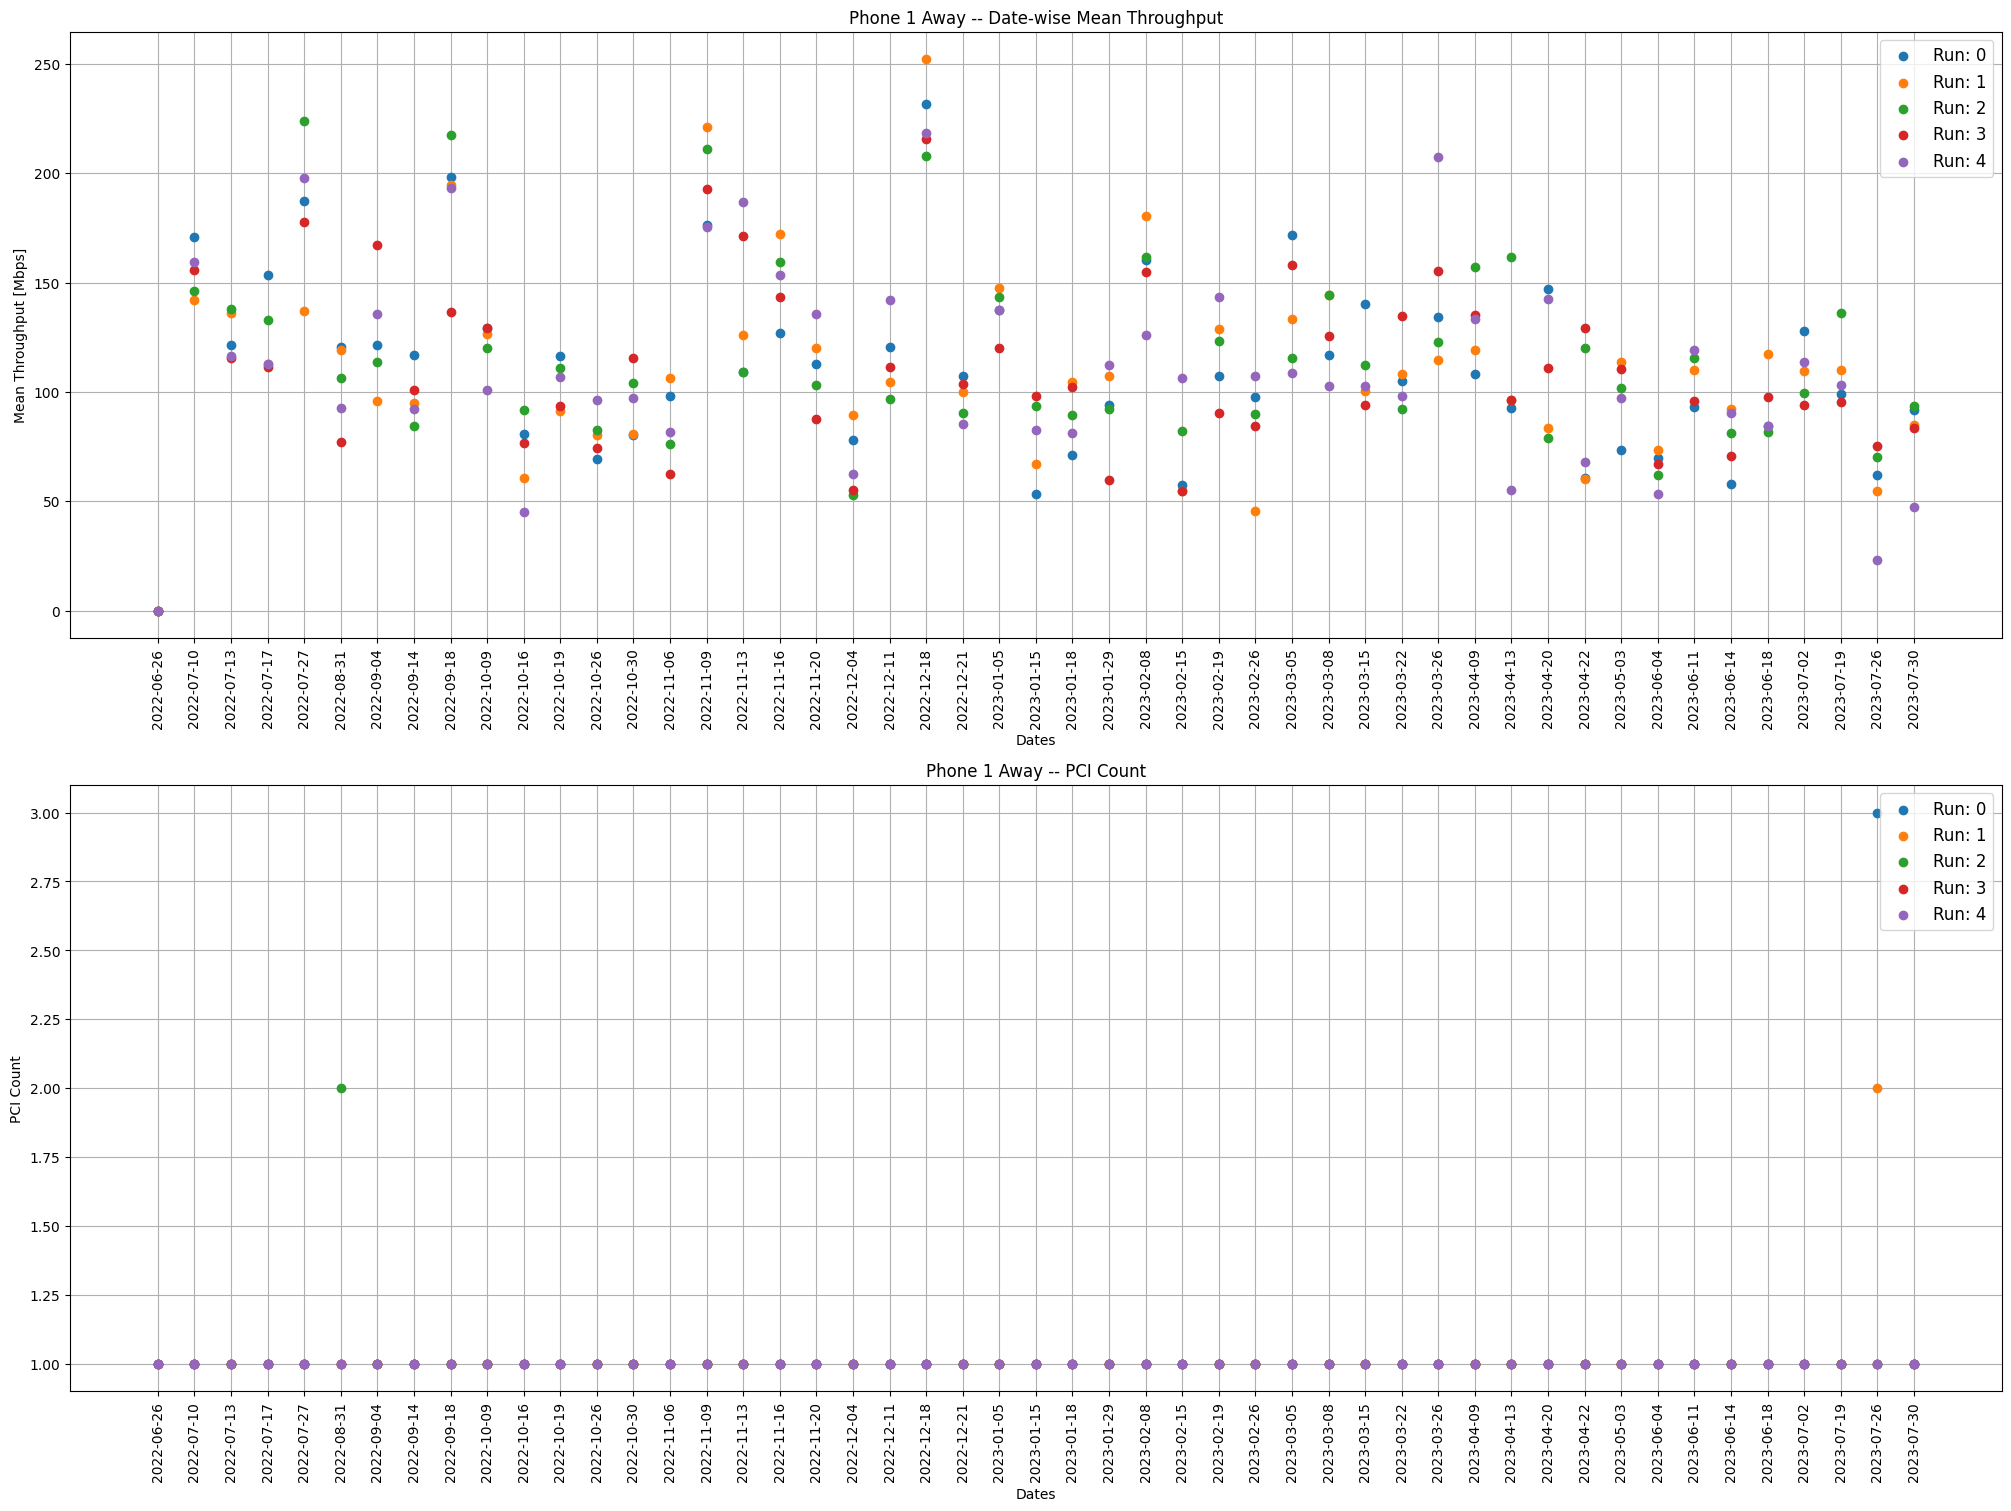

In [31]:
GeneratePCIThroughput("Phone1Away.csv", "Phone 1 Away")

/tmp/ipykernel_46634/1049631699.py:27: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b = True)
/tmp/ipykernel_46634/1049631699.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(dfExp["TIME_STAMP"], rotation=90)
/tmp/ipykernel_46634/1049631699.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(Keys, rotation=90)


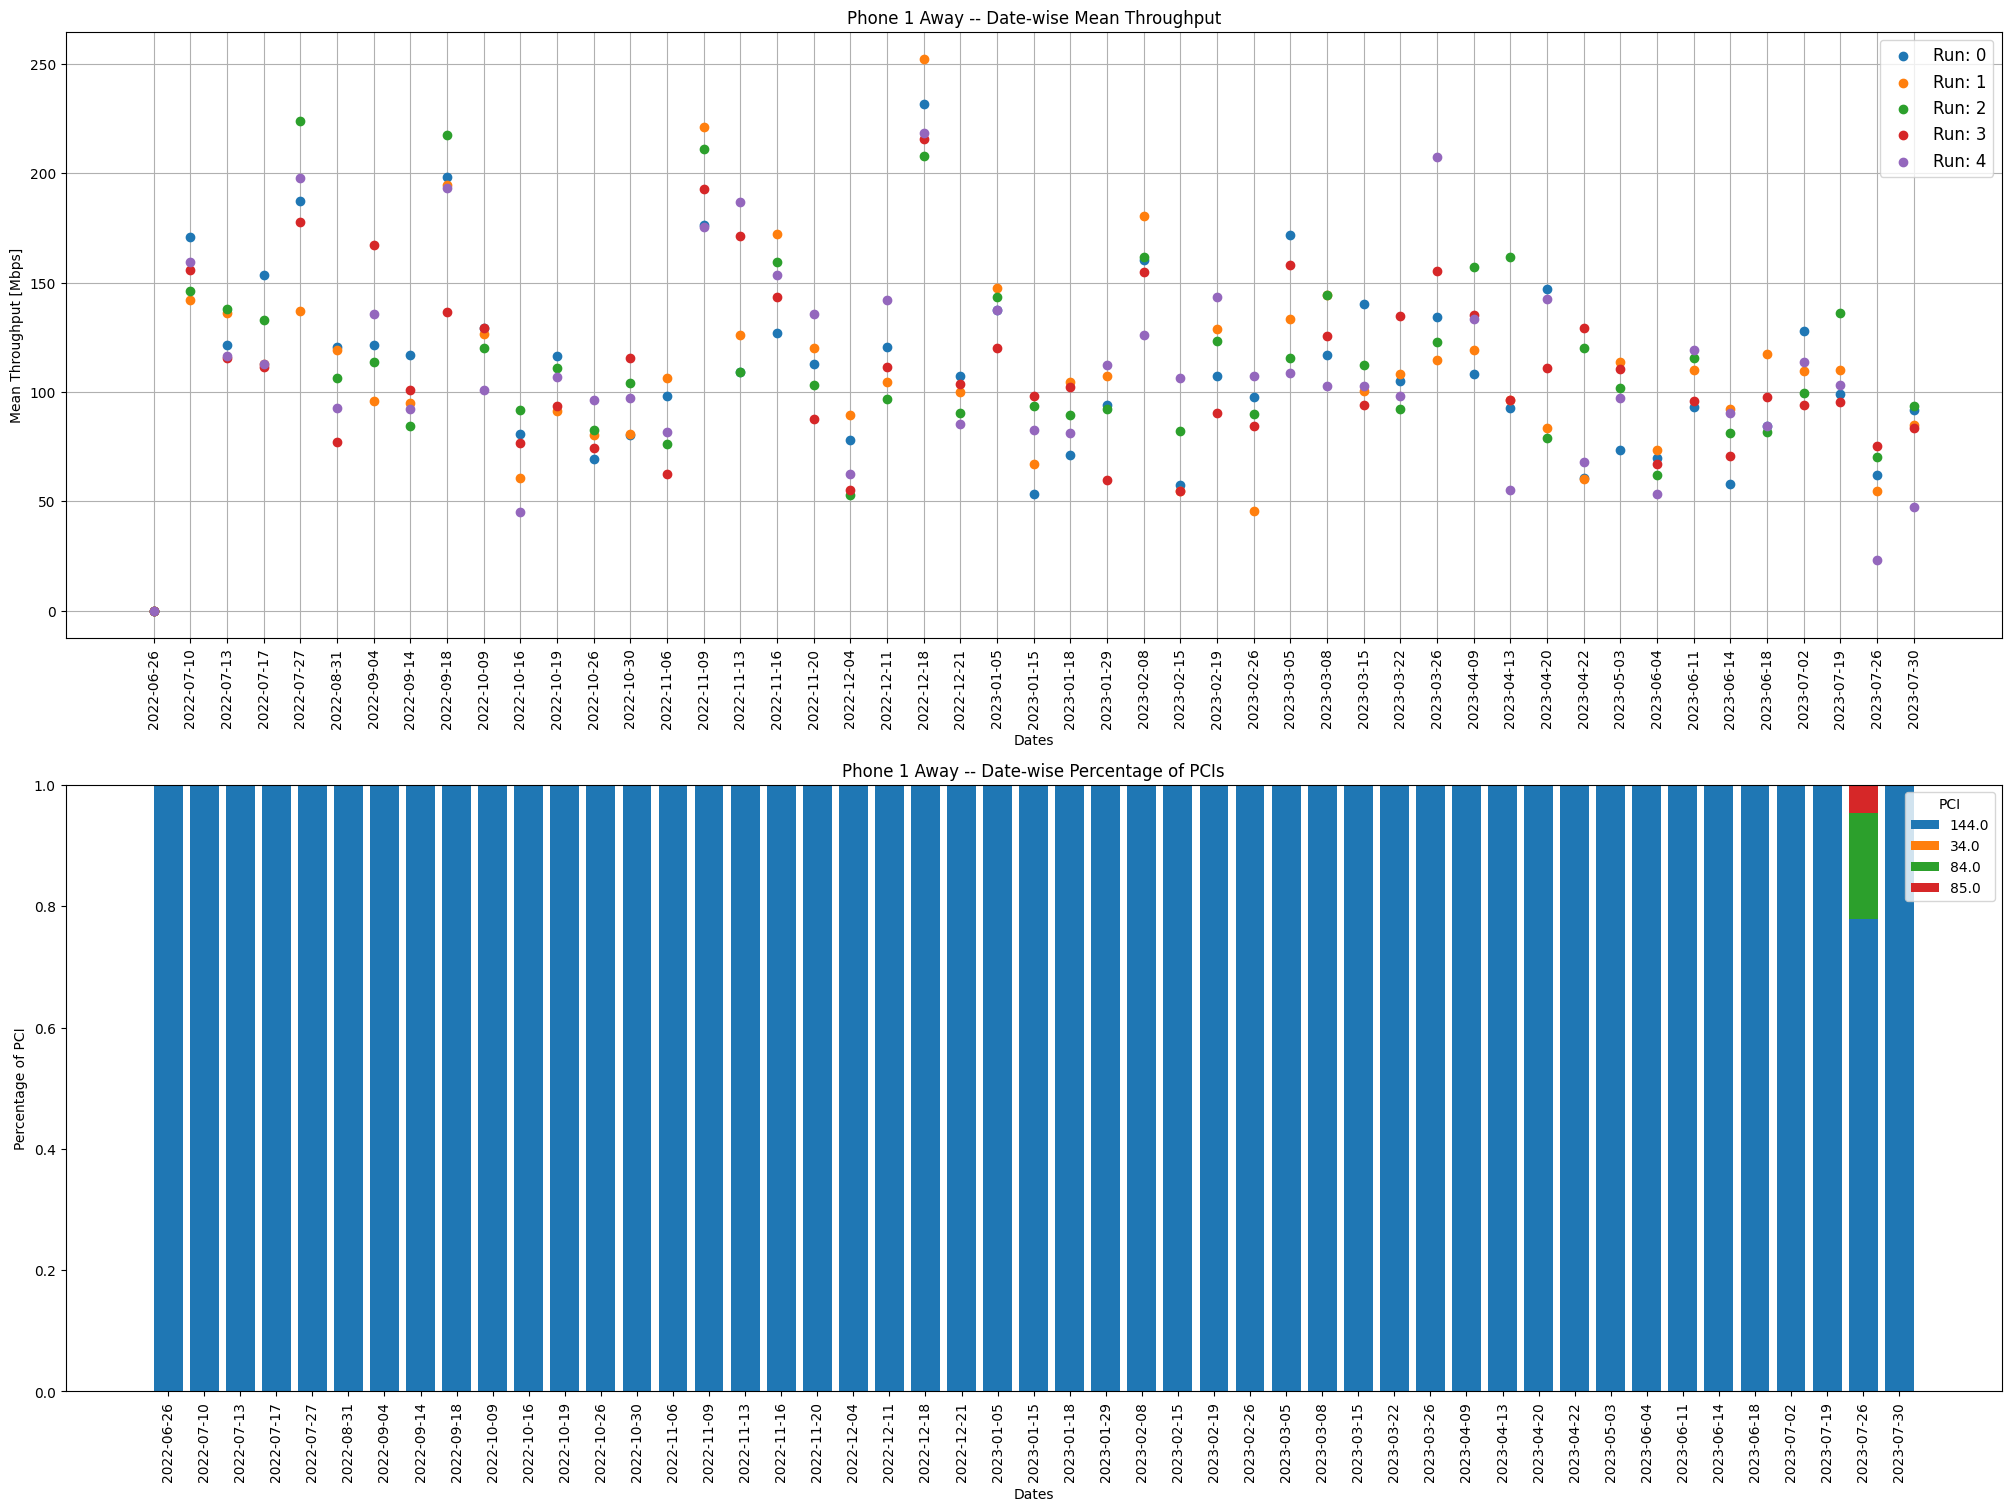

In [41]:
GenerateGraphPCI("Phone1Away.csv", "Phone 1 Away")

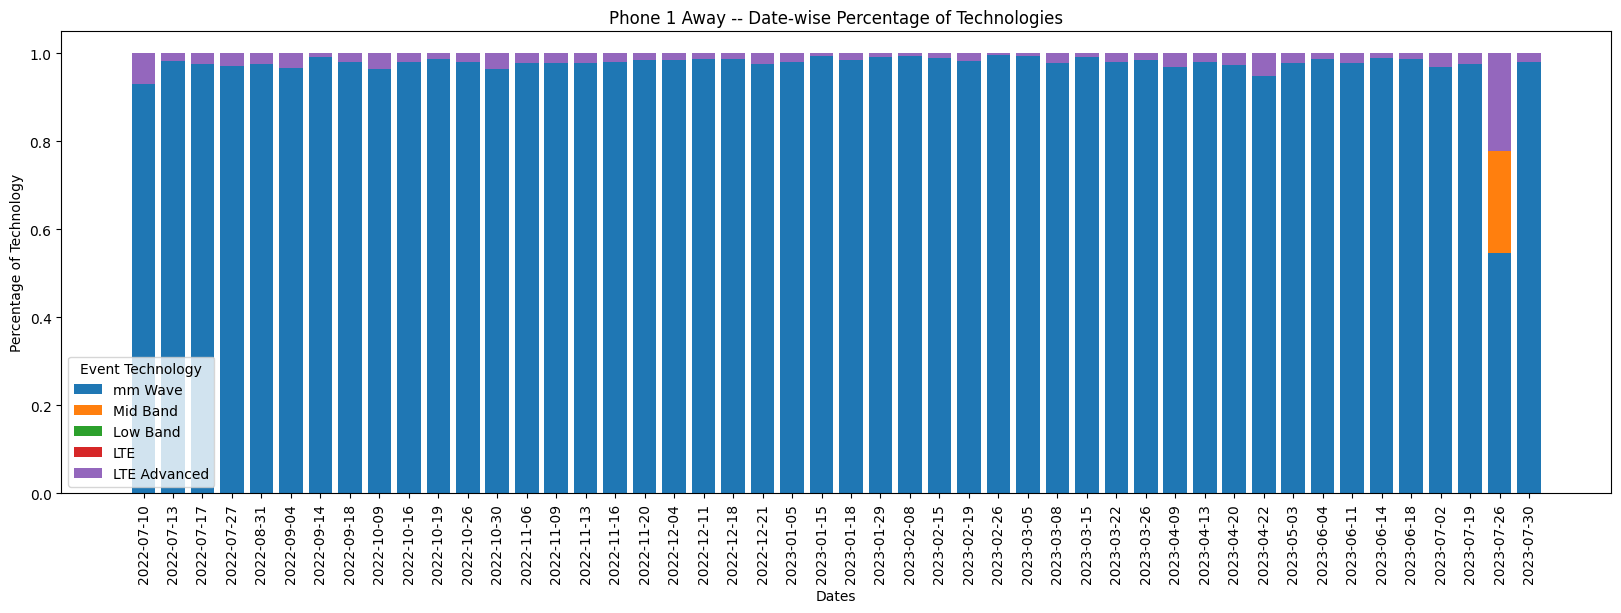

In [71]:
GenerateGraph("Phone1Away.csv", "Phone 1 Away")

/tmp/ipykernel_1007188/1459905543.py:25: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b = True)
/tmp/ipykernel_1007188/1459905543.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(dfExp["TIME_STAMP"], rotation=90)
/tmp/ipykernel_1007188/1459905543.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(dfExp["TIME_STAMP"], rotation=90)
/tmp/ipykernel_1007188/1459905543.py:46: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b = True)


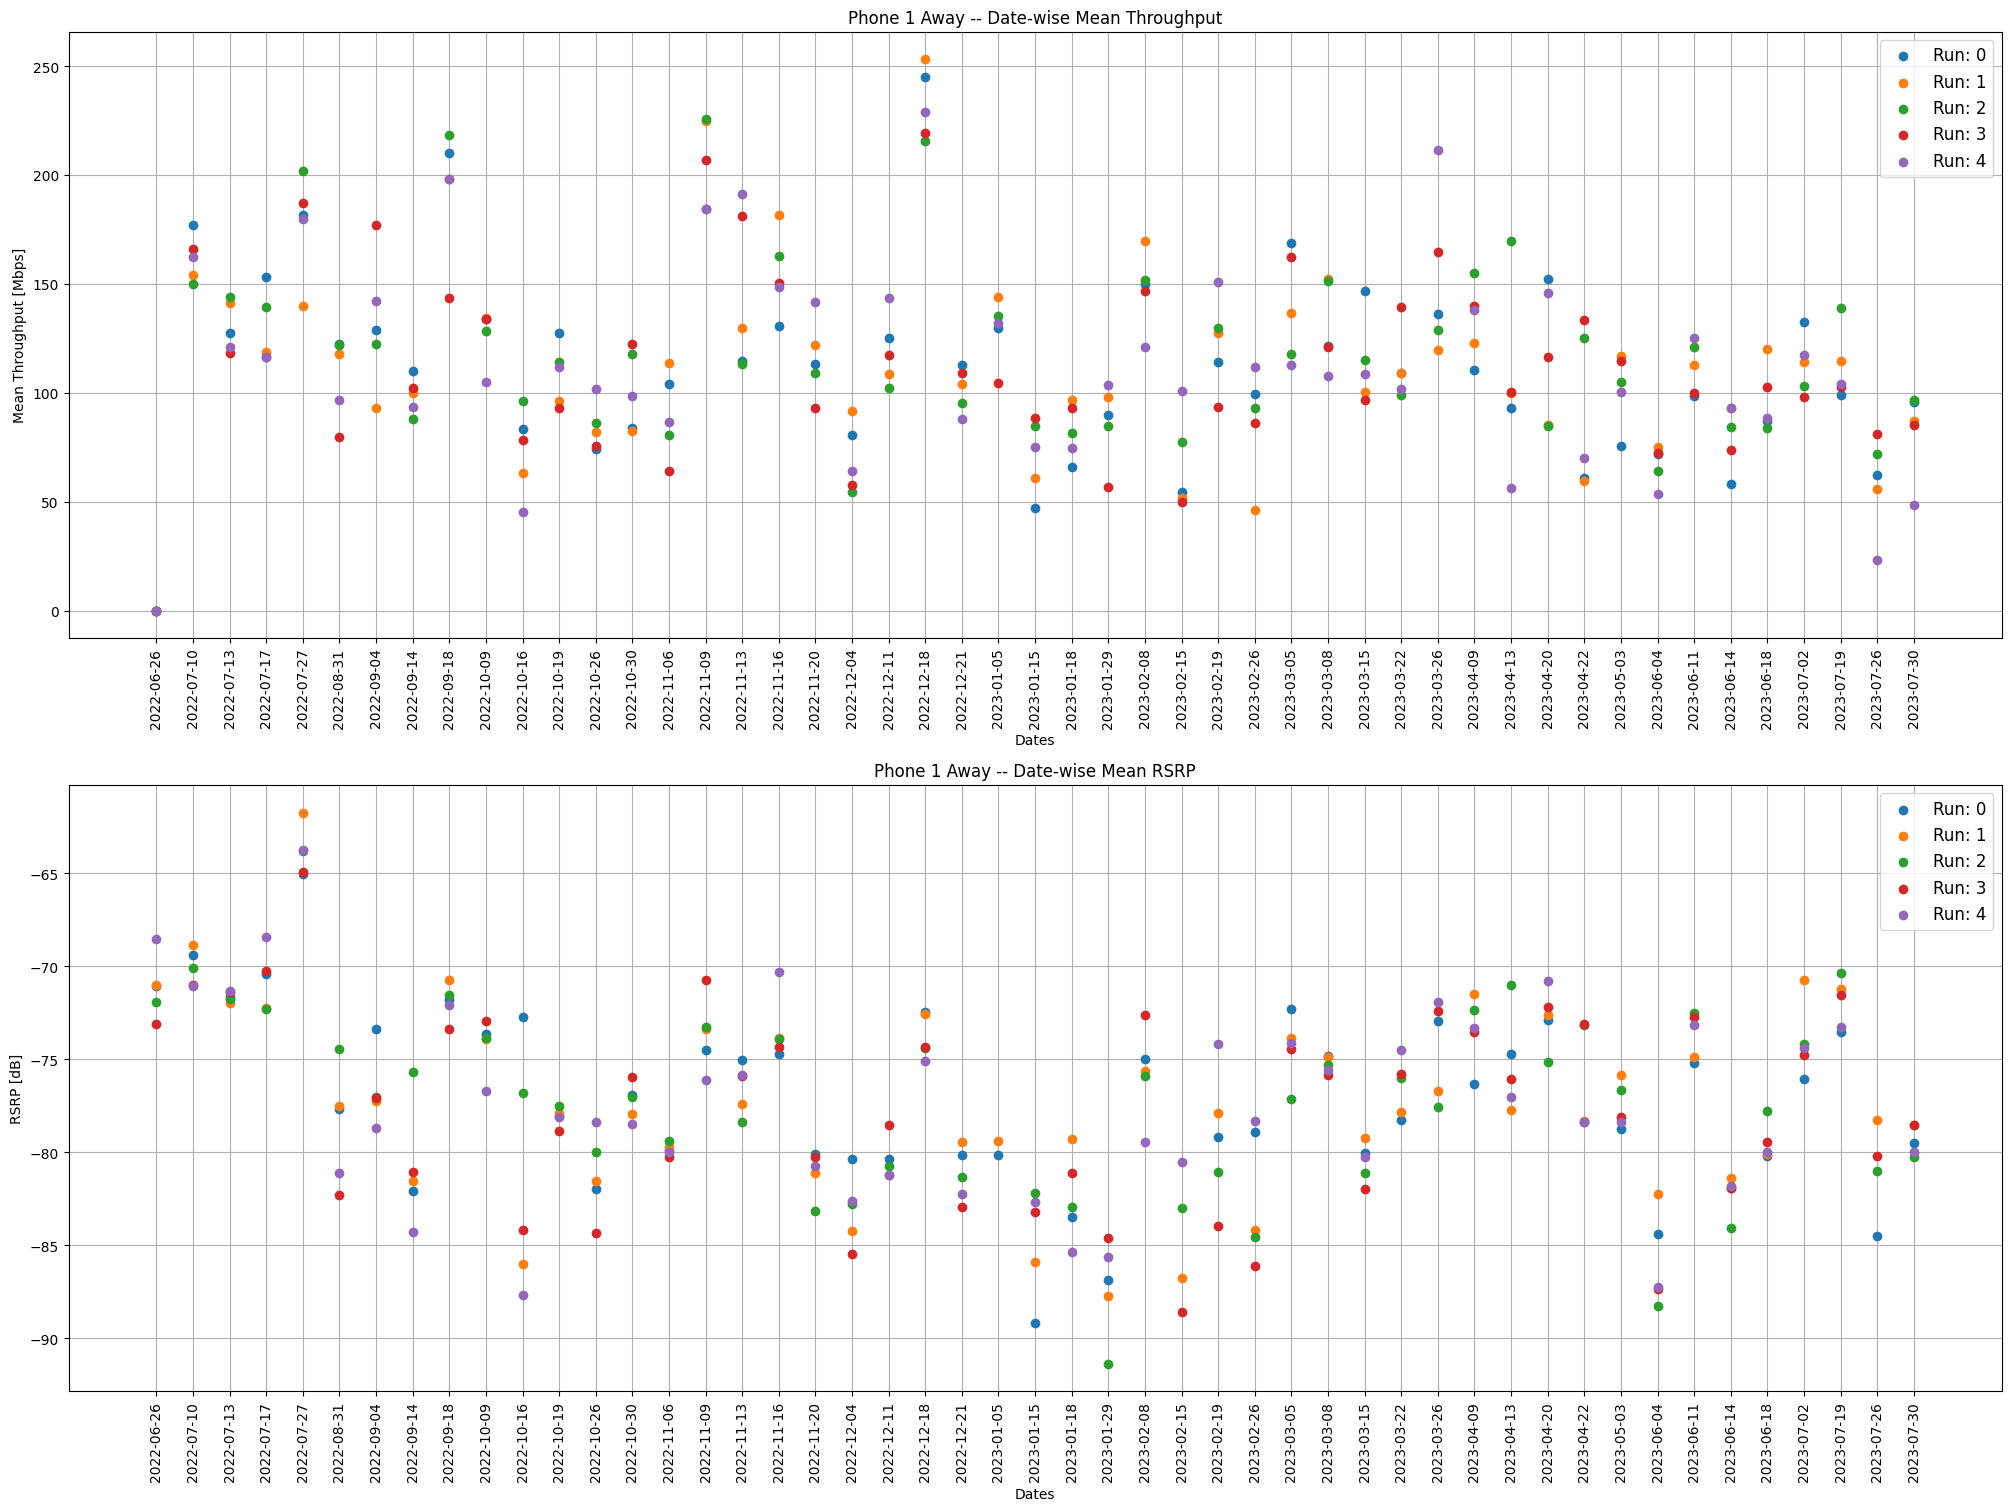

In [24]:
GenerateGraphThroughputScatterRSRP("Phone1Away.csv", "Phone 1 Away")

/tmp/ipykernel_1007188/3039753332.py:25: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b = True)
/tmp/ipykernel_1007188/3039753332.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(dfExp["TIME_STAMP"], rotation=90)
/tmp/ipykernel_1007188/3039753332.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(dfExp["TIME_STAMP"], rotation=90)
/tmp/ipykernel_1007188/3039753332.py:47: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b = True)


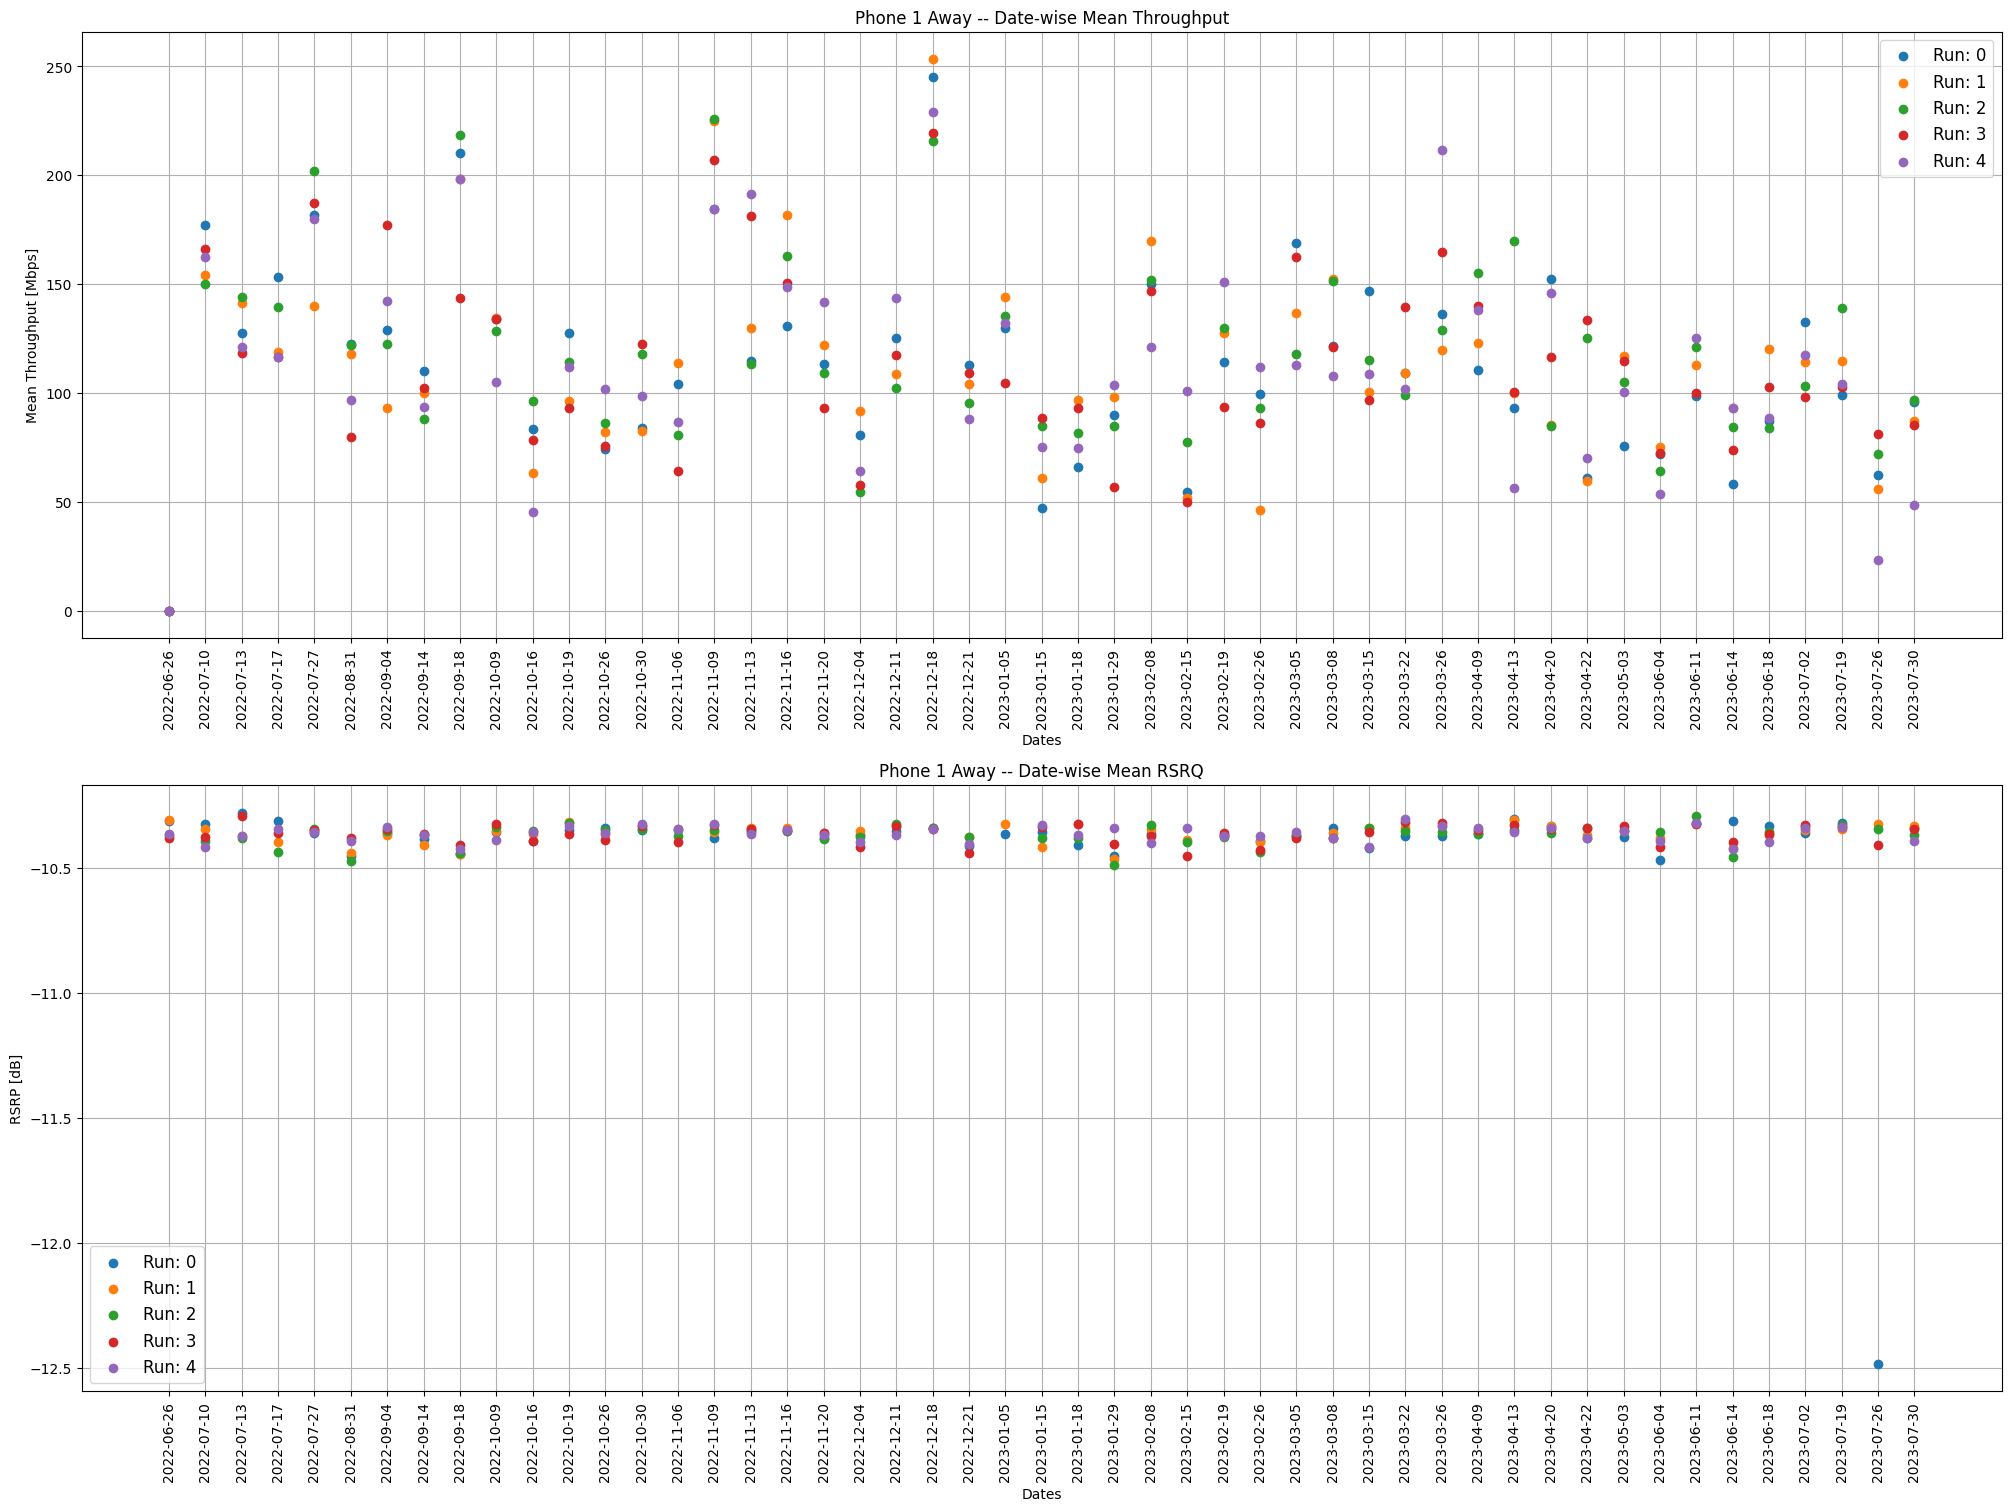

In [25]:
GenerateGraphThroughputScatterRSRQ("Phone1Away.csv", "Phone 1 Away")

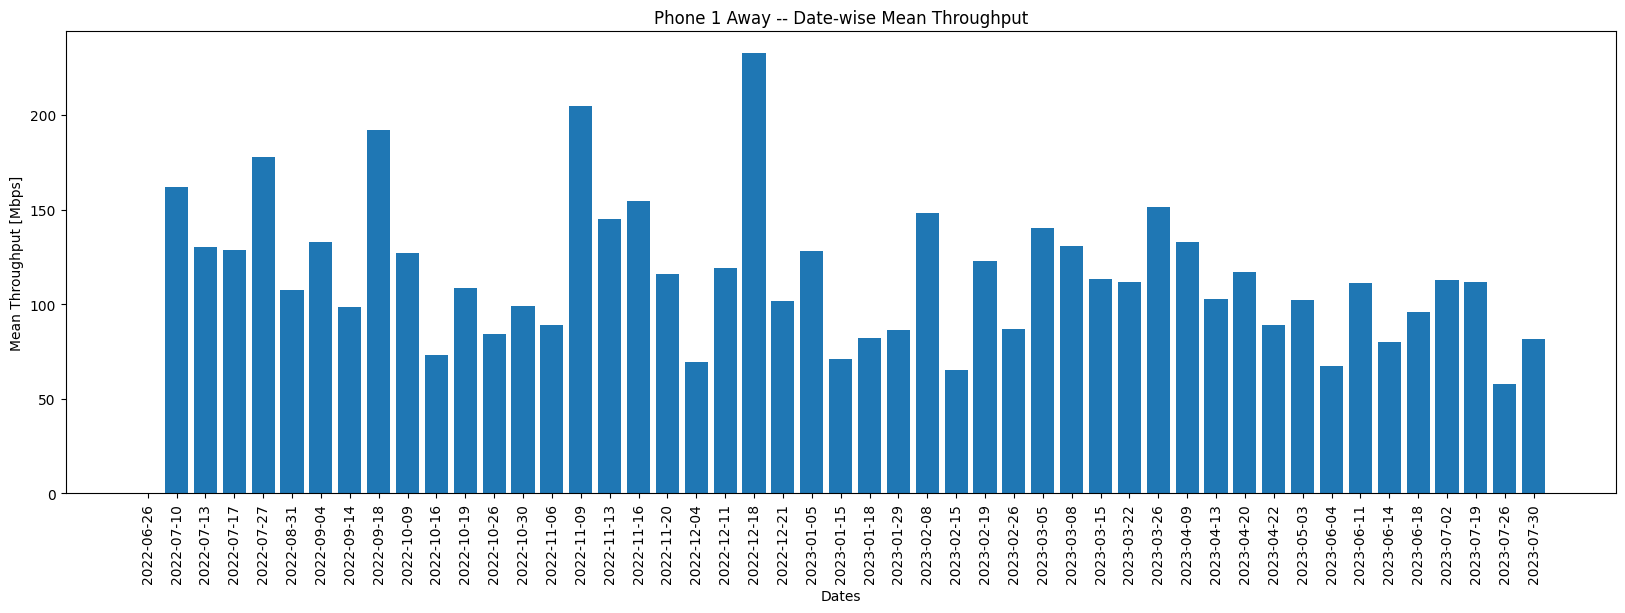

In [12]:
GenerateGraphThroughput("Phone1Away.csv", "Phone 1 Away")

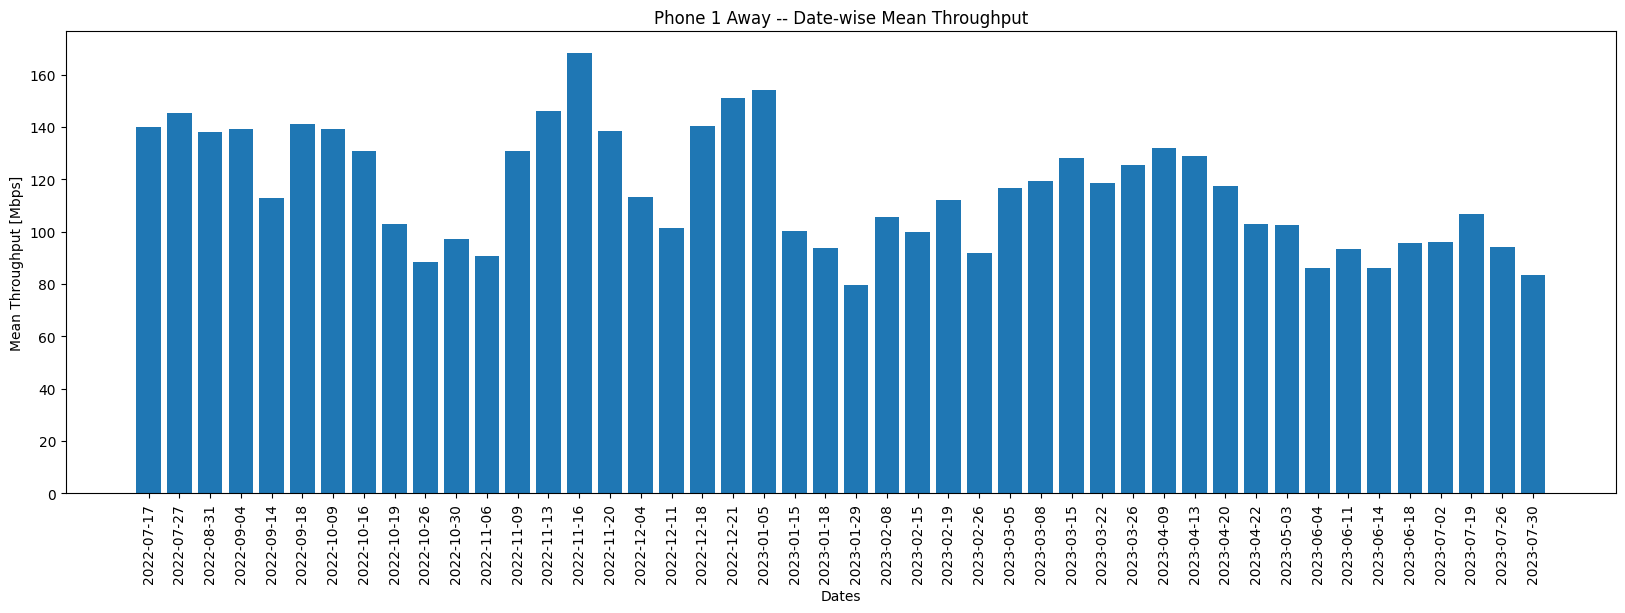

In [29]:
GenerateGraphThroughputSmooth("Phone1Away.csv", "Phone 1 Away")

/tmp/ipykernel_46634/1049631699.py:27: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b = True)
/tmp/ipykernel_46634/1049631699.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(dfExp["TIME_STAMP"], rotation=90)
/tmp/ipykernel_46634/1049631699.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(Keys, rotation=90)


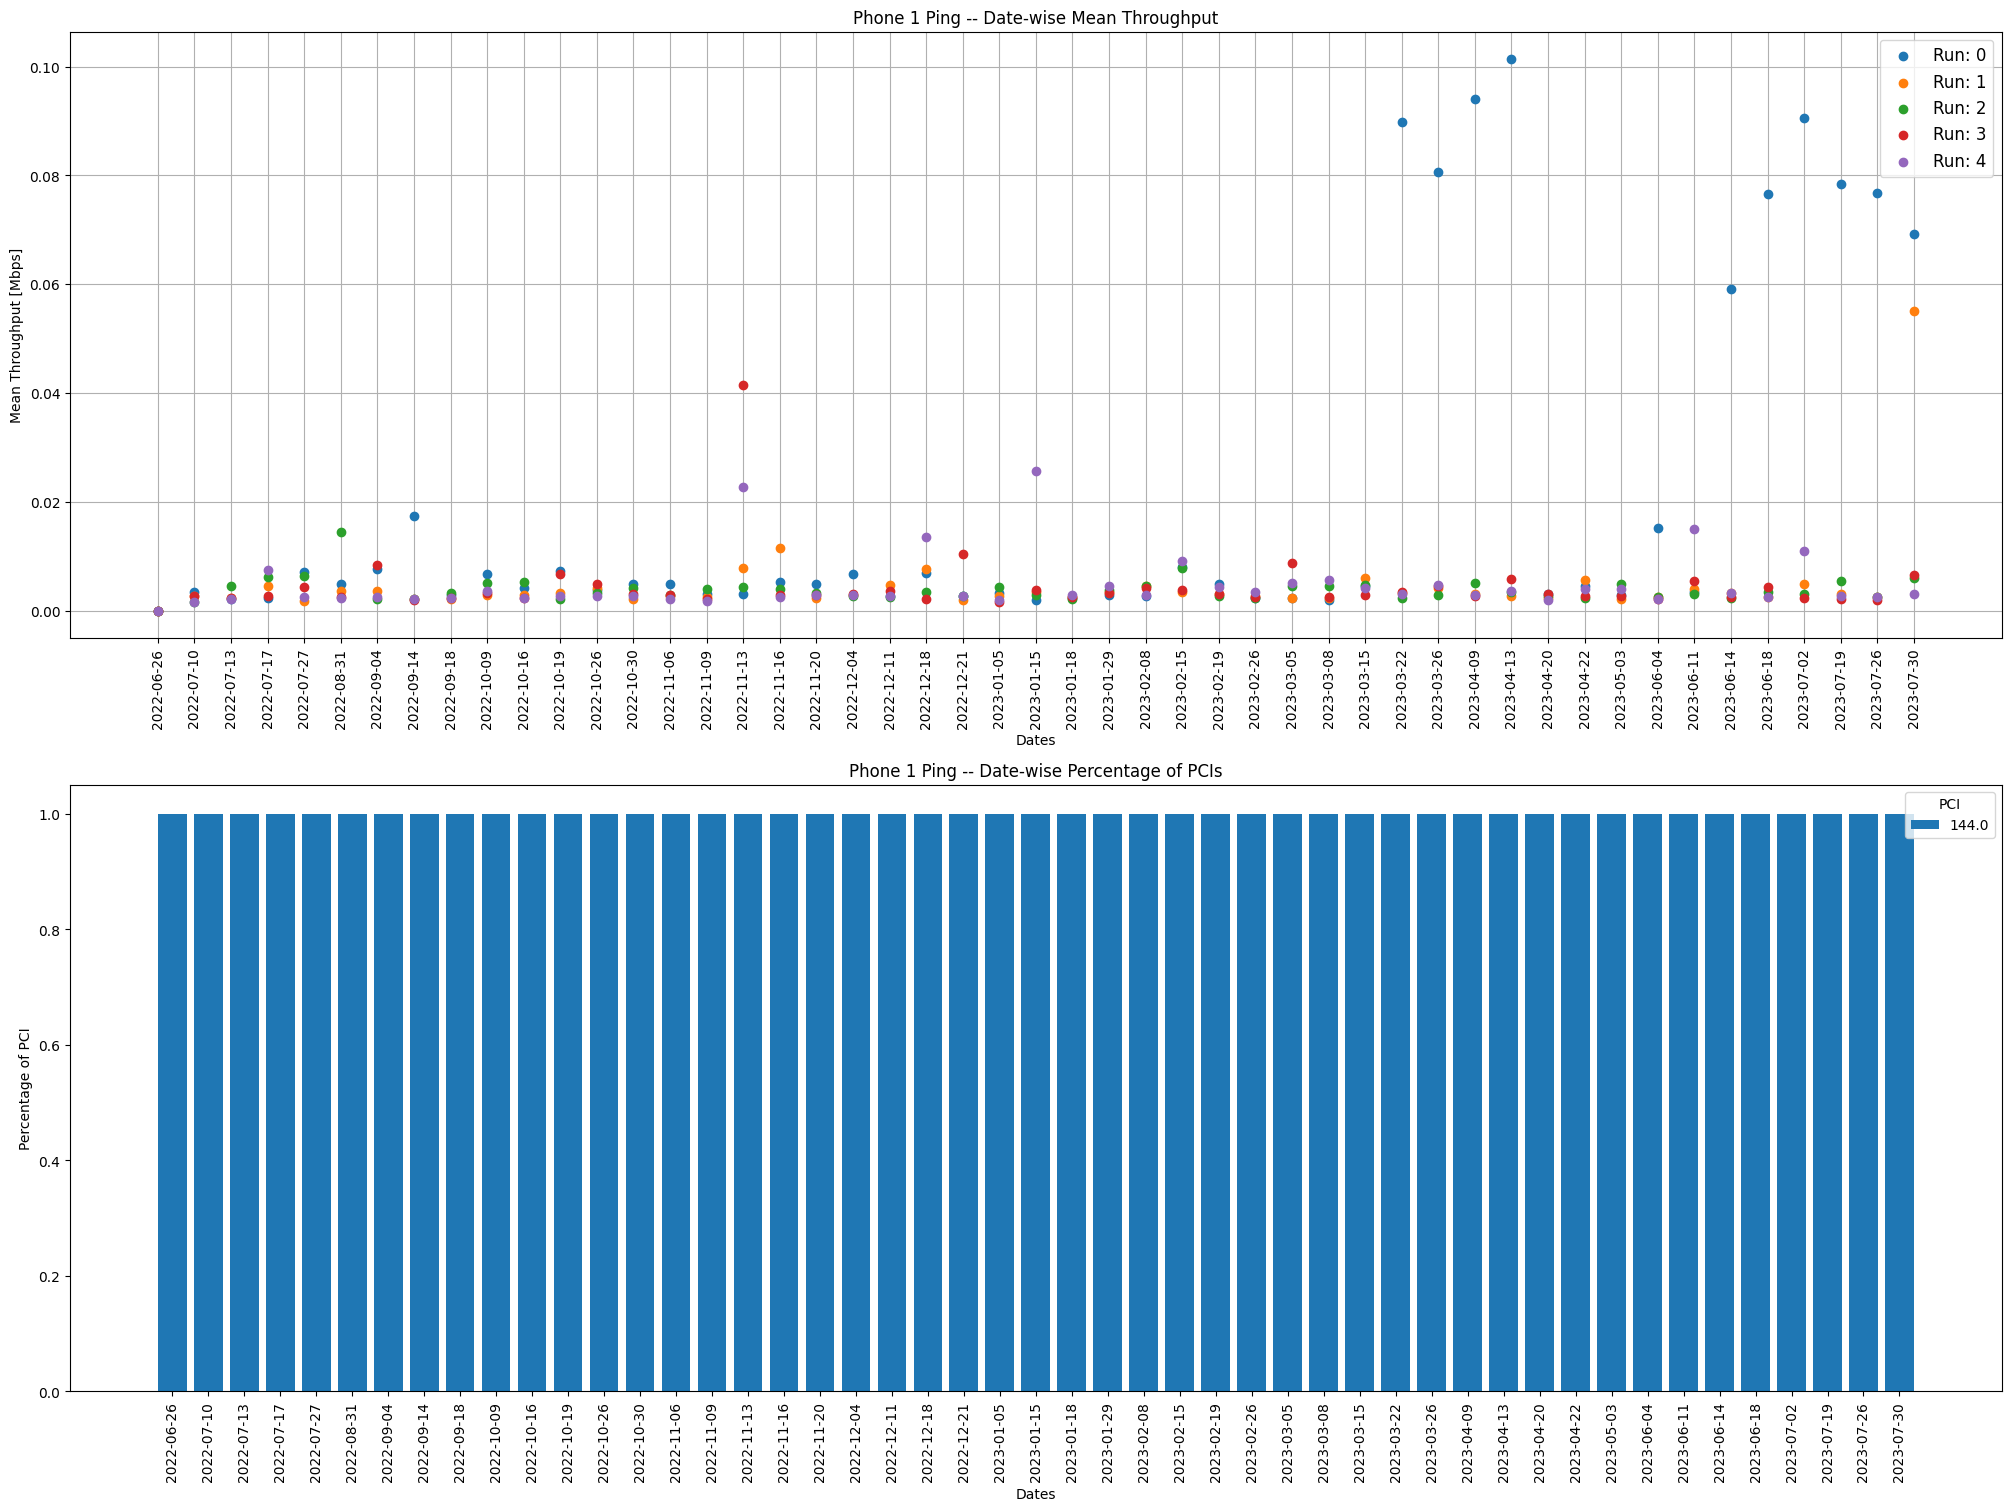

In [42]:
GenerateGraphPCI("Phone1Ping.csv", "Phone 1 Ping")

/tmp/ipykernel_46634/38667571.py:25: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b = True)
/tmp/ipykernel_46634/38667571.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(dfExp["TIME_STAMP"], rotation=90)
/tmp/ipykernel_46634/38667571.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(dfExp["TIME_STAMP"], rotation=90)
/tmp/ipykernel_46634/38667571.py:48: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b = True)


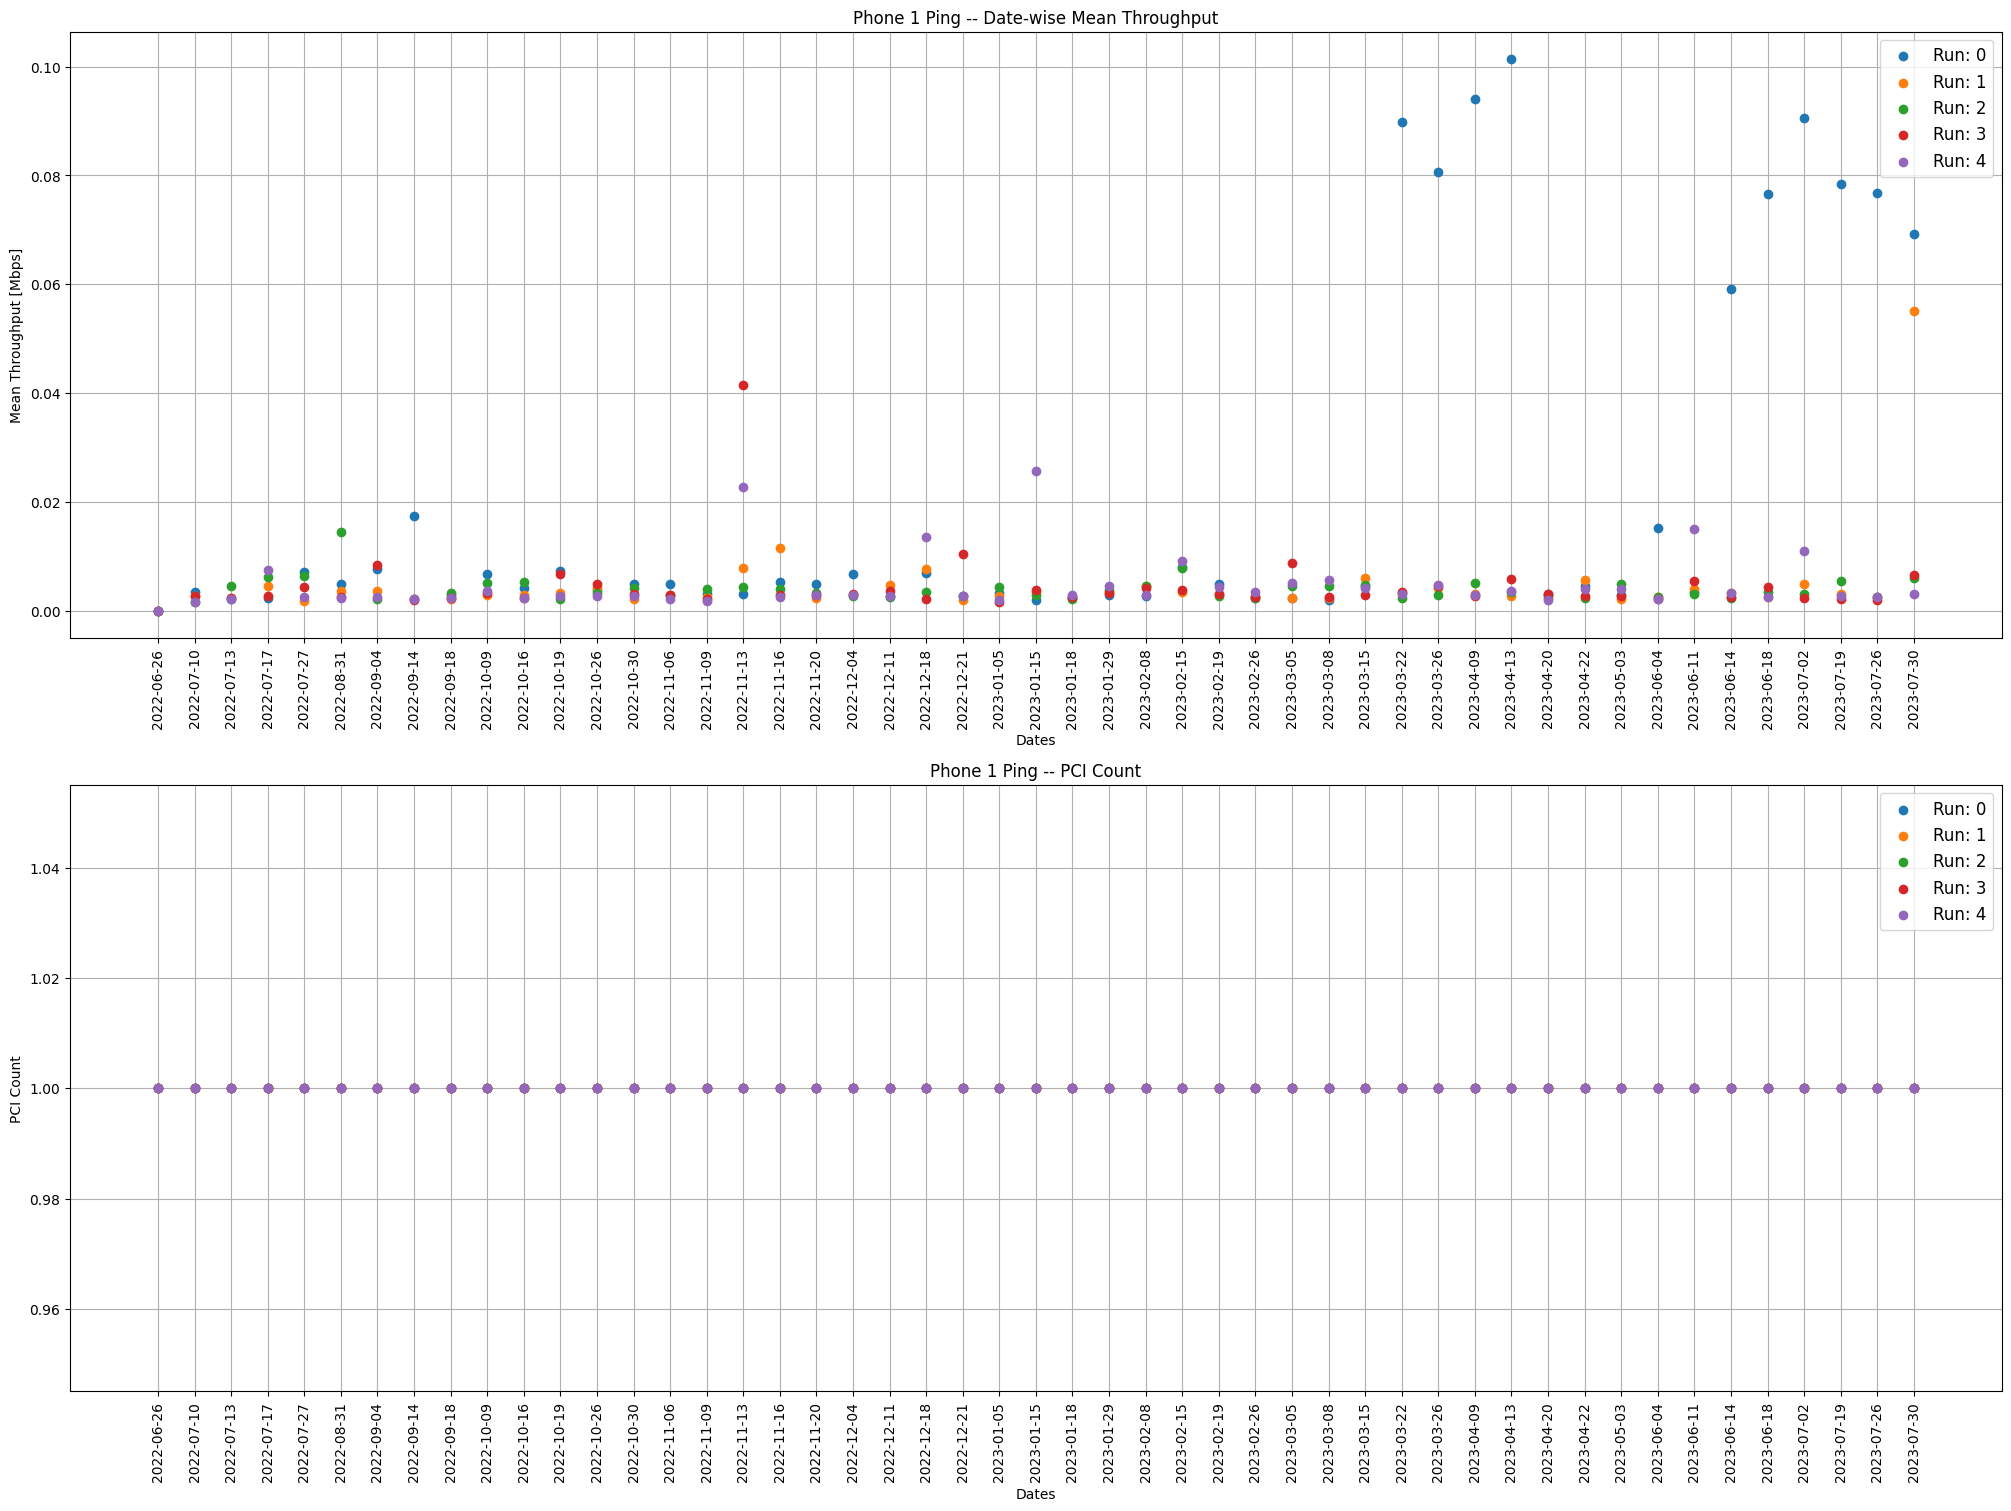

In [36]:
GeneratePCIThroughput("Phone1Ping.csv", "Phone 1 Ping")

/tmp/ipykernel_46634/1049631699.py:27: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b = True)
/tmp/ipykernel_46634/1049631699.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(dfExp["TIME_STAMP"], rotation=90)
/tmp/ipykernel_46634/1049631699.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(Keys, rotation=90)


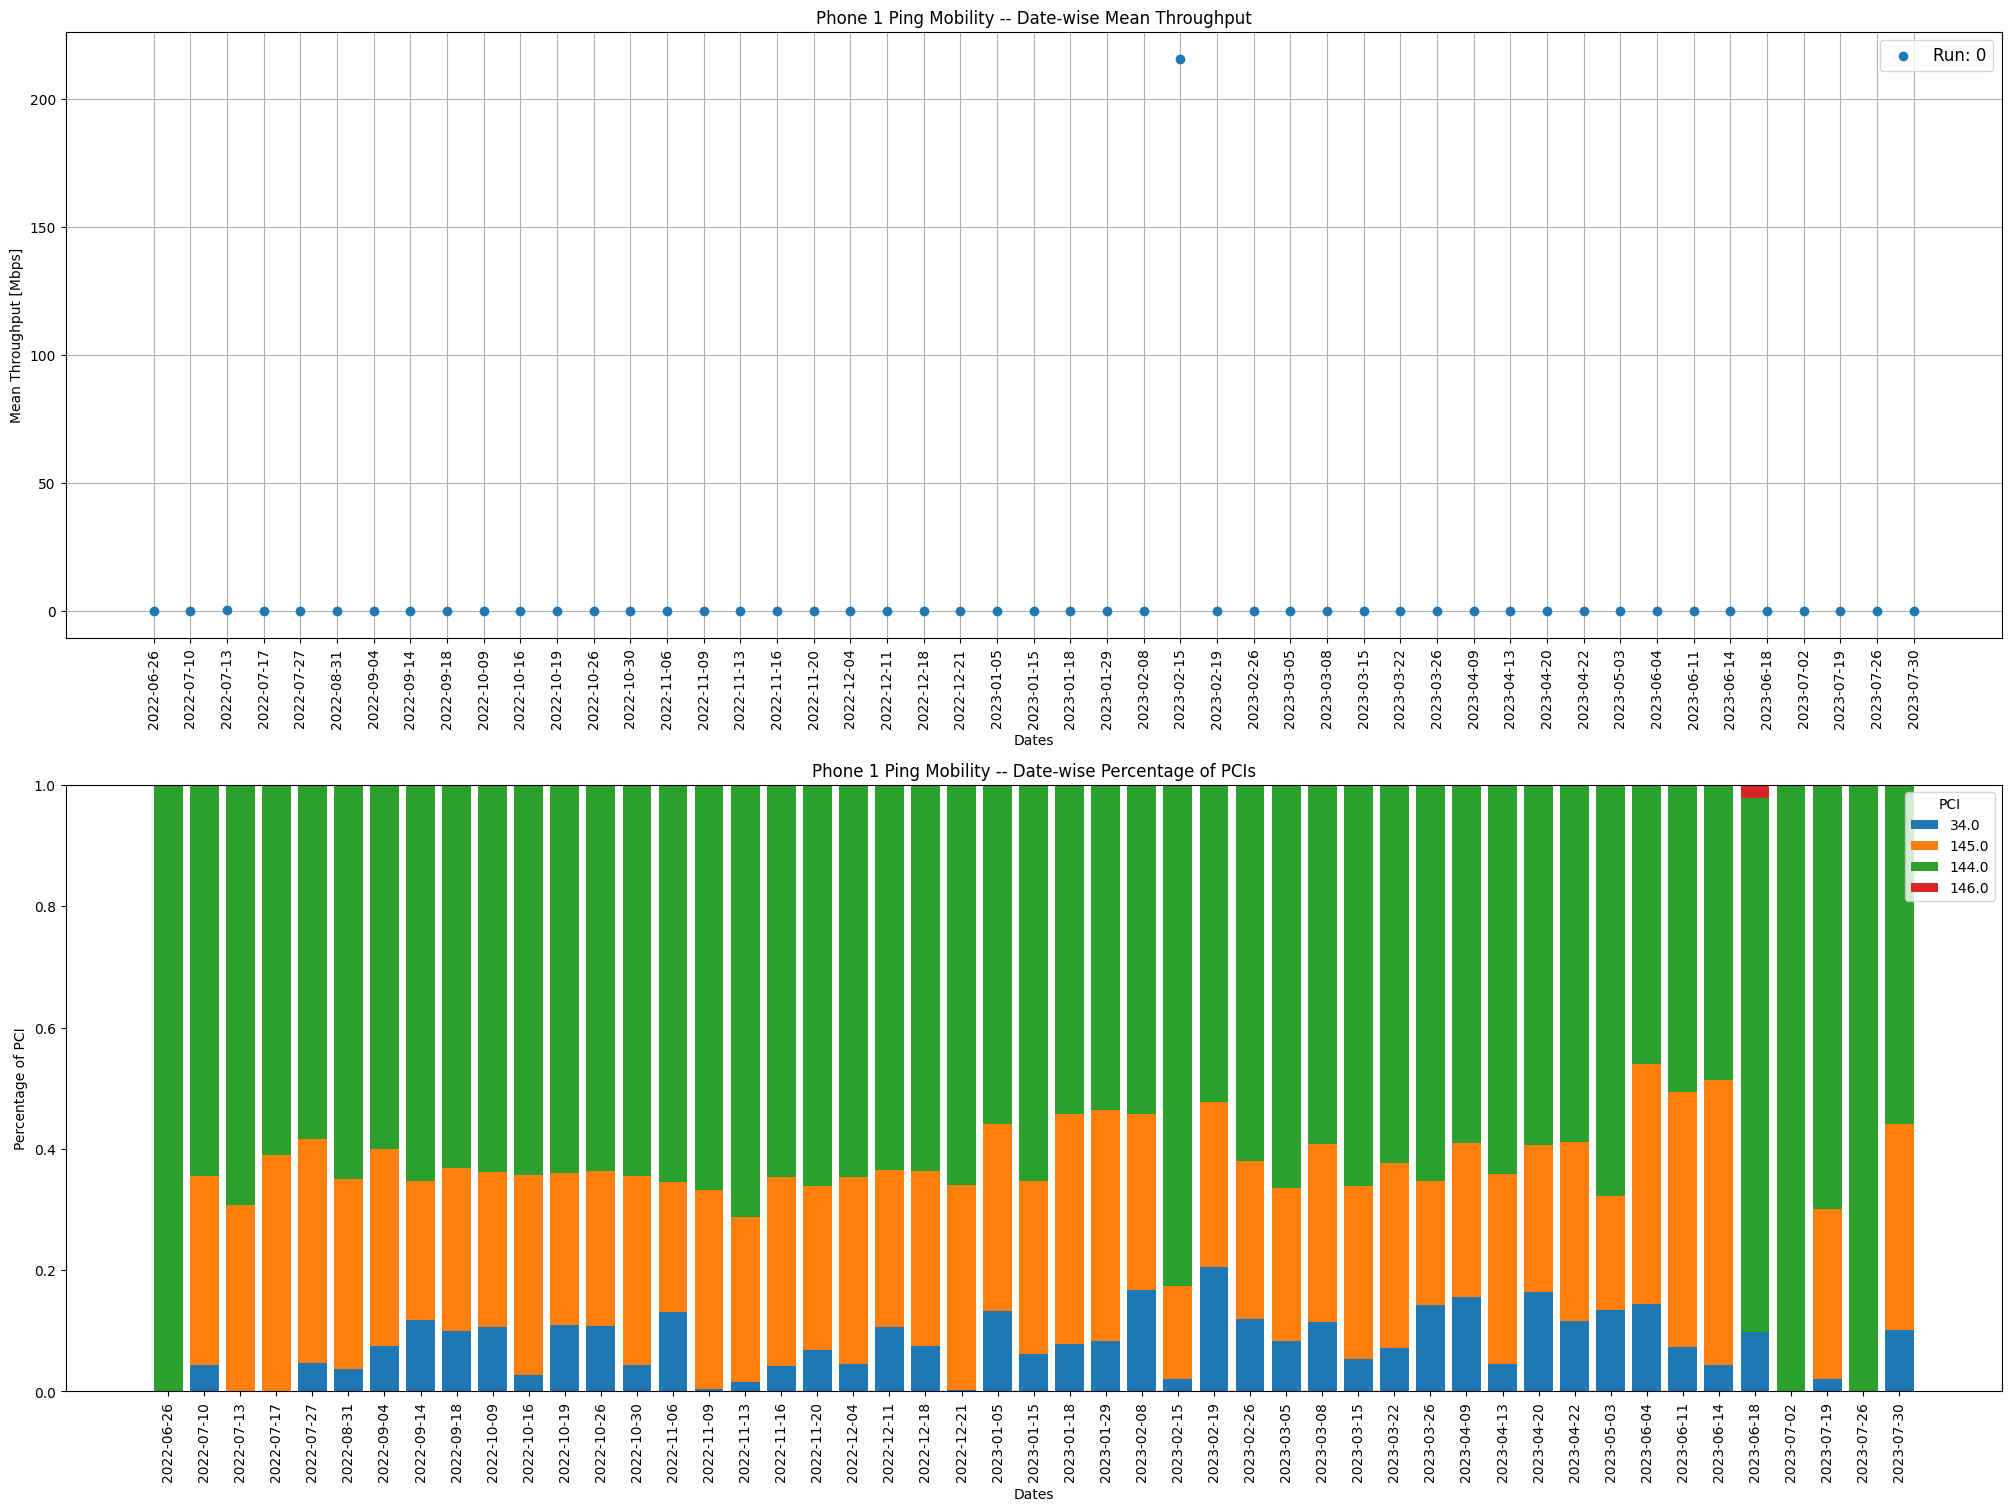

In [43]:
GenerateGraphPCI("Phone1PingMobility.csv", "Phone 1 Ping Mobility")

/tmp/ipykernel_46634/38667571.py:25: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b = True)
/tmp/ipykernel_46634/38667571.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(dfExp["TIME_STAMP"], rotation=90)
/tmp/ipykernel_46634/38667571.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(dfExp["TIME_STAMP"], rotation=90)
/tmp/ipykernel_46634/38667571.py:48: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b = True)


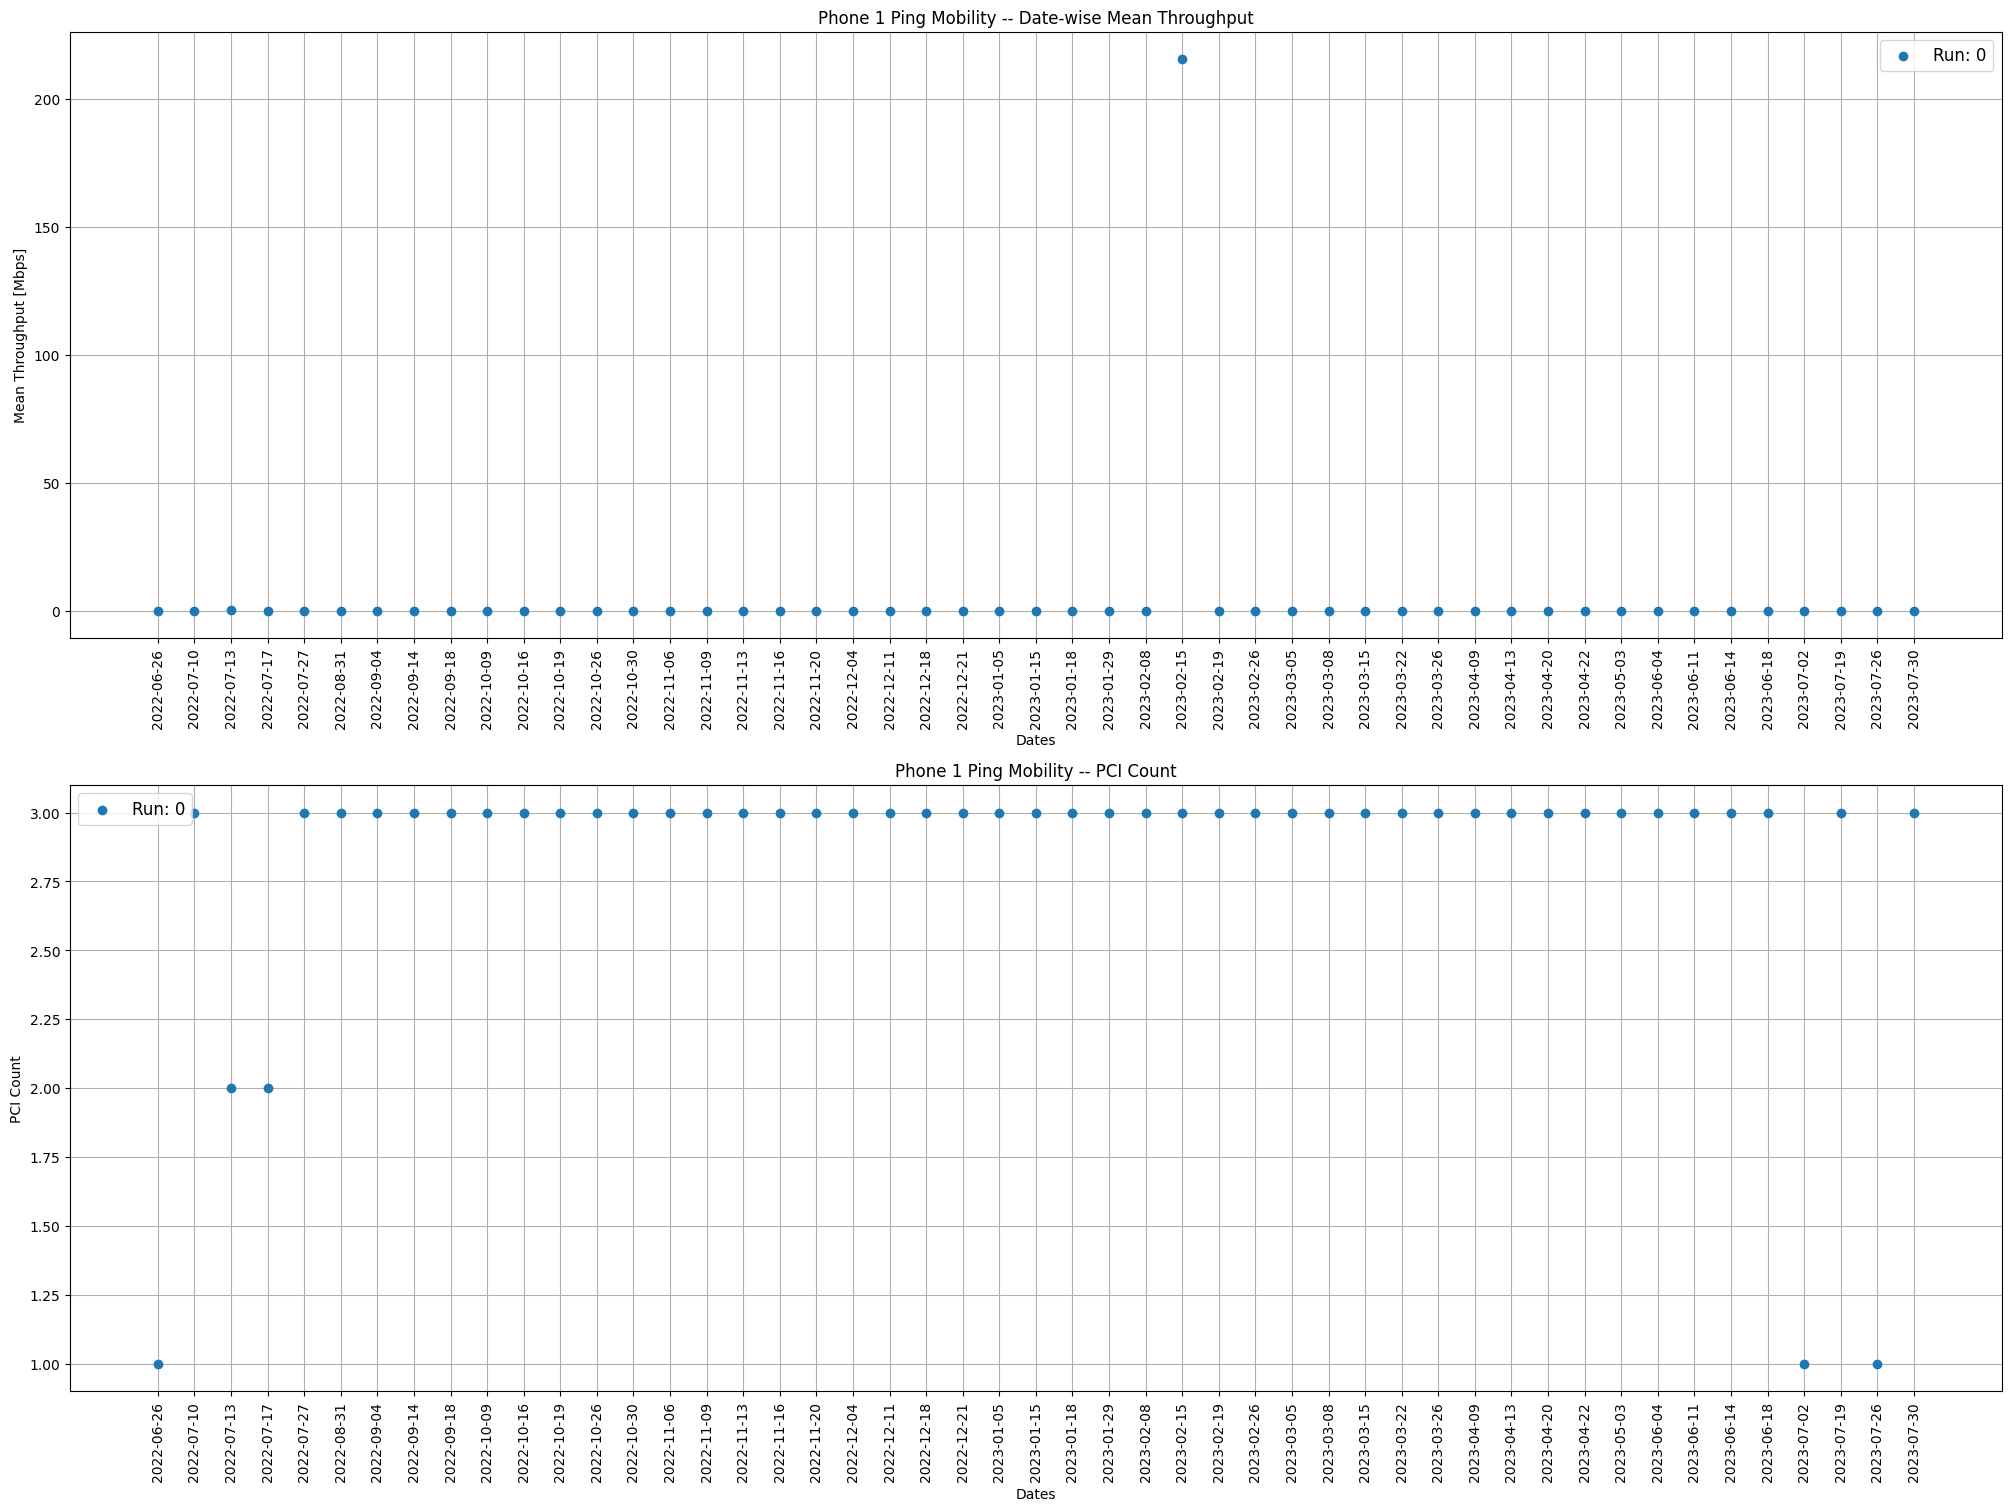

In [37]:
GeneratePCIThroughput("Phone1PingMobility.csv", "Phone 1 Ping Mobility")

/tmp/ipykernel_46634/1049631699.py:27: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b = True)
/tmp/ipykernel_46634/1049631699.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(dfExp["TIME_STAMP"], rotation=90)
/tmp/ipykernel_46634/1049631699.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(Keys, rotation=90)


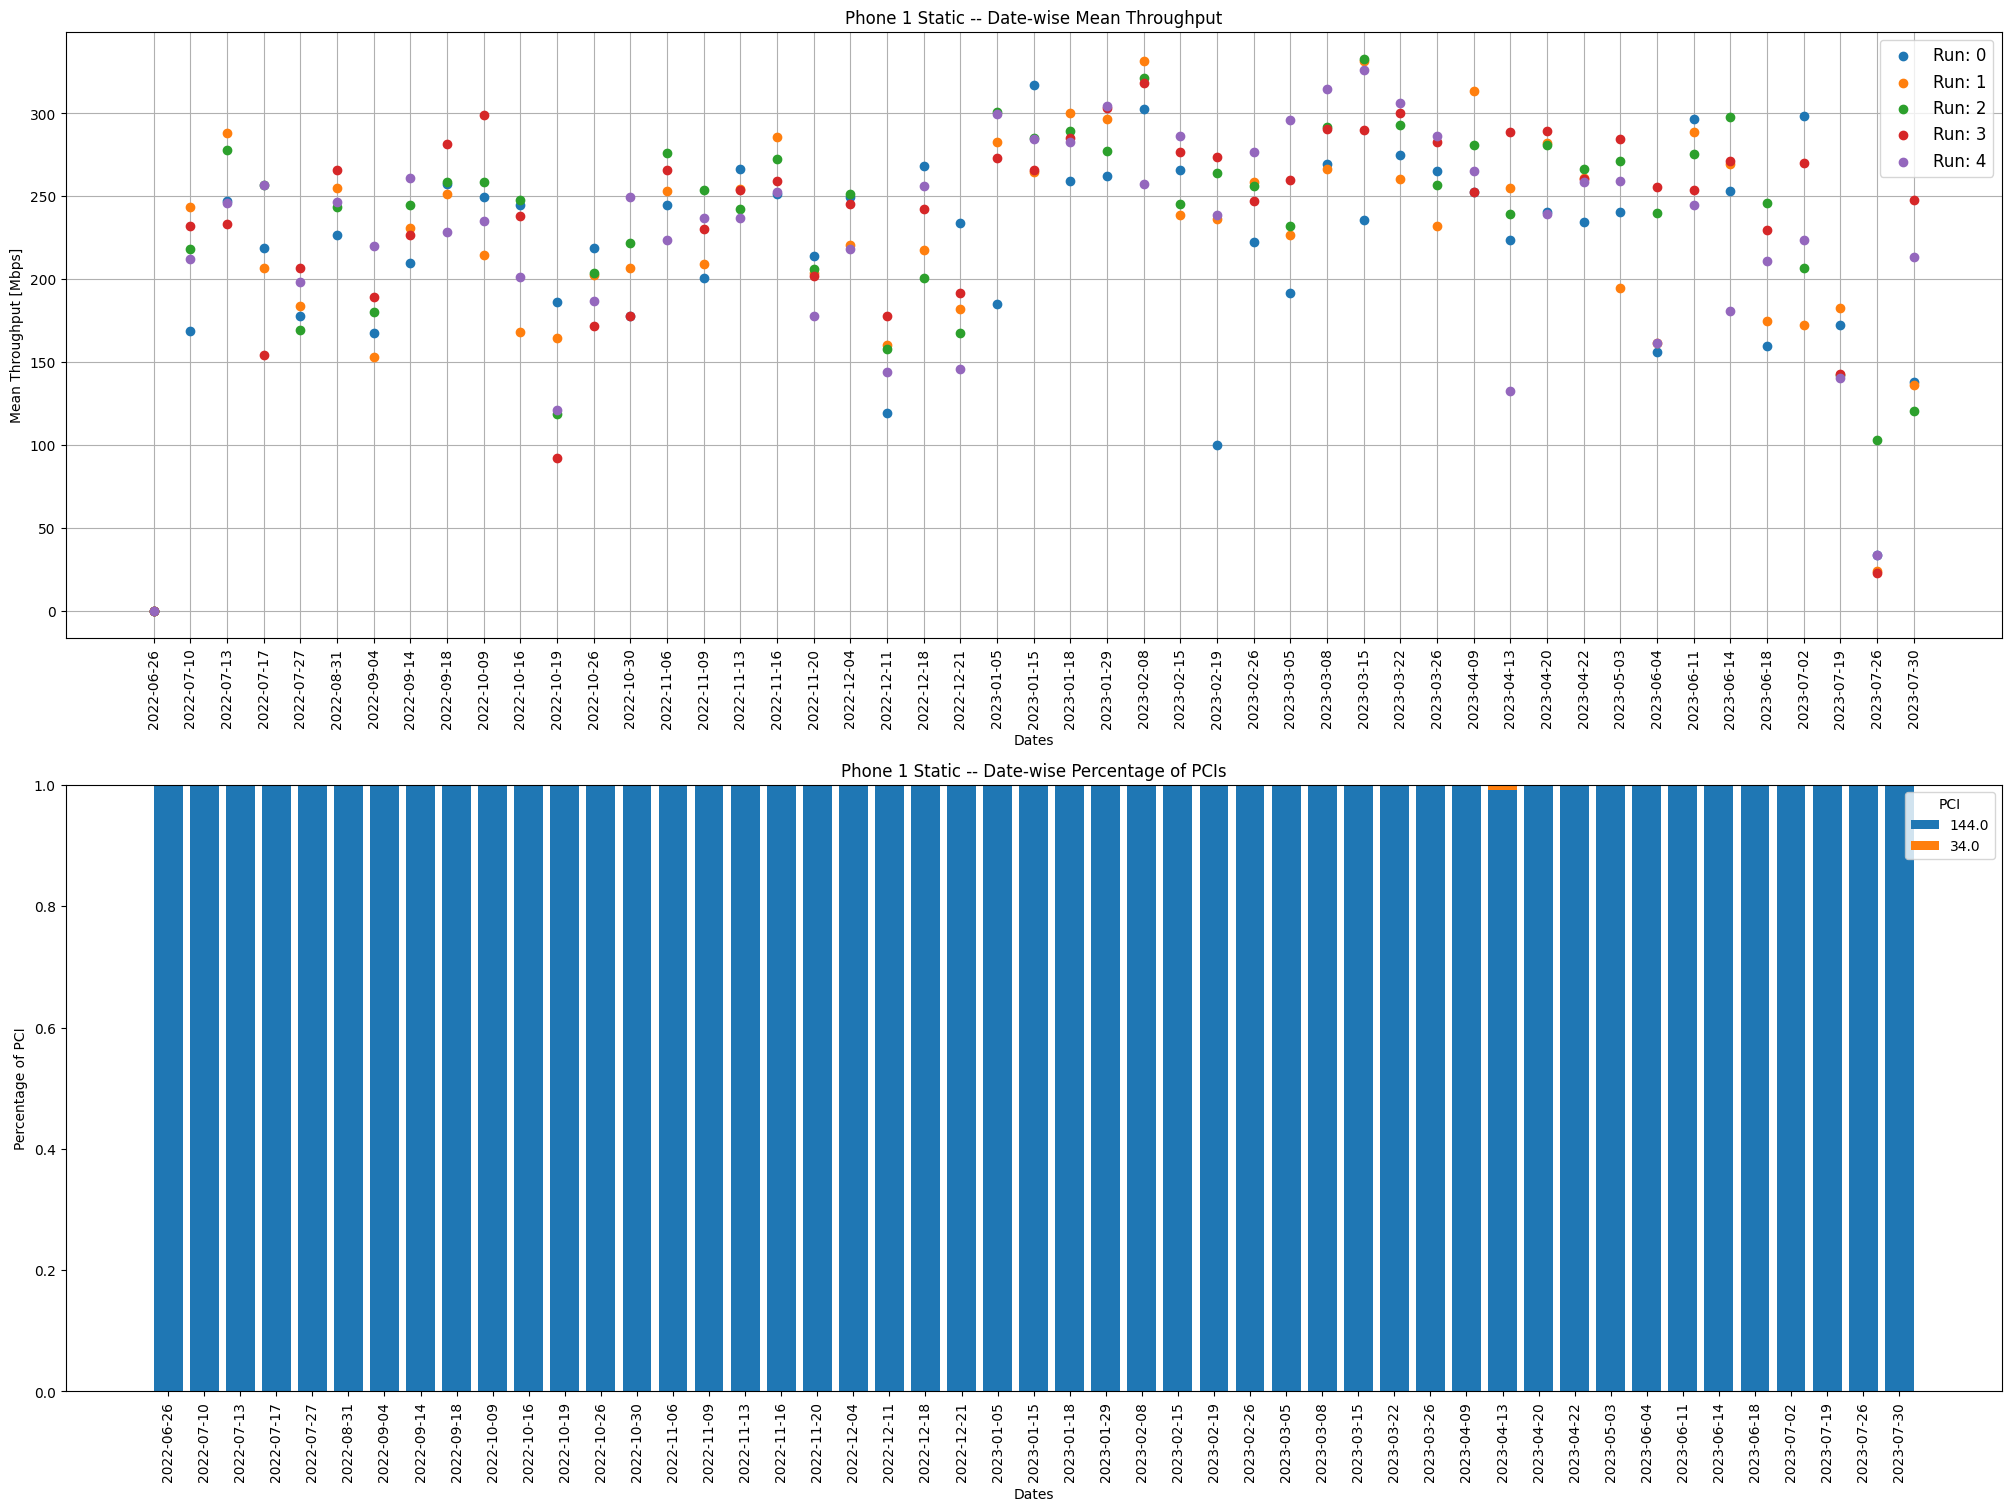

In [45]:
GenerateGraphPCI("Phone1Static.csv", "Phone 1 Static")

/tmp/ipykernel_46634/38667571.py:25: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b = True)
/tmp/ipykernel_46634/38667571.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(dfExp["TIME_STAMP"], rotation=90)
/tmp/ipykernel_46634/38667571.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(dfExp["TIME_STAMP"], rotation=90)
/tmp/ipykernel_46634/38667571.py:48: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b = True)


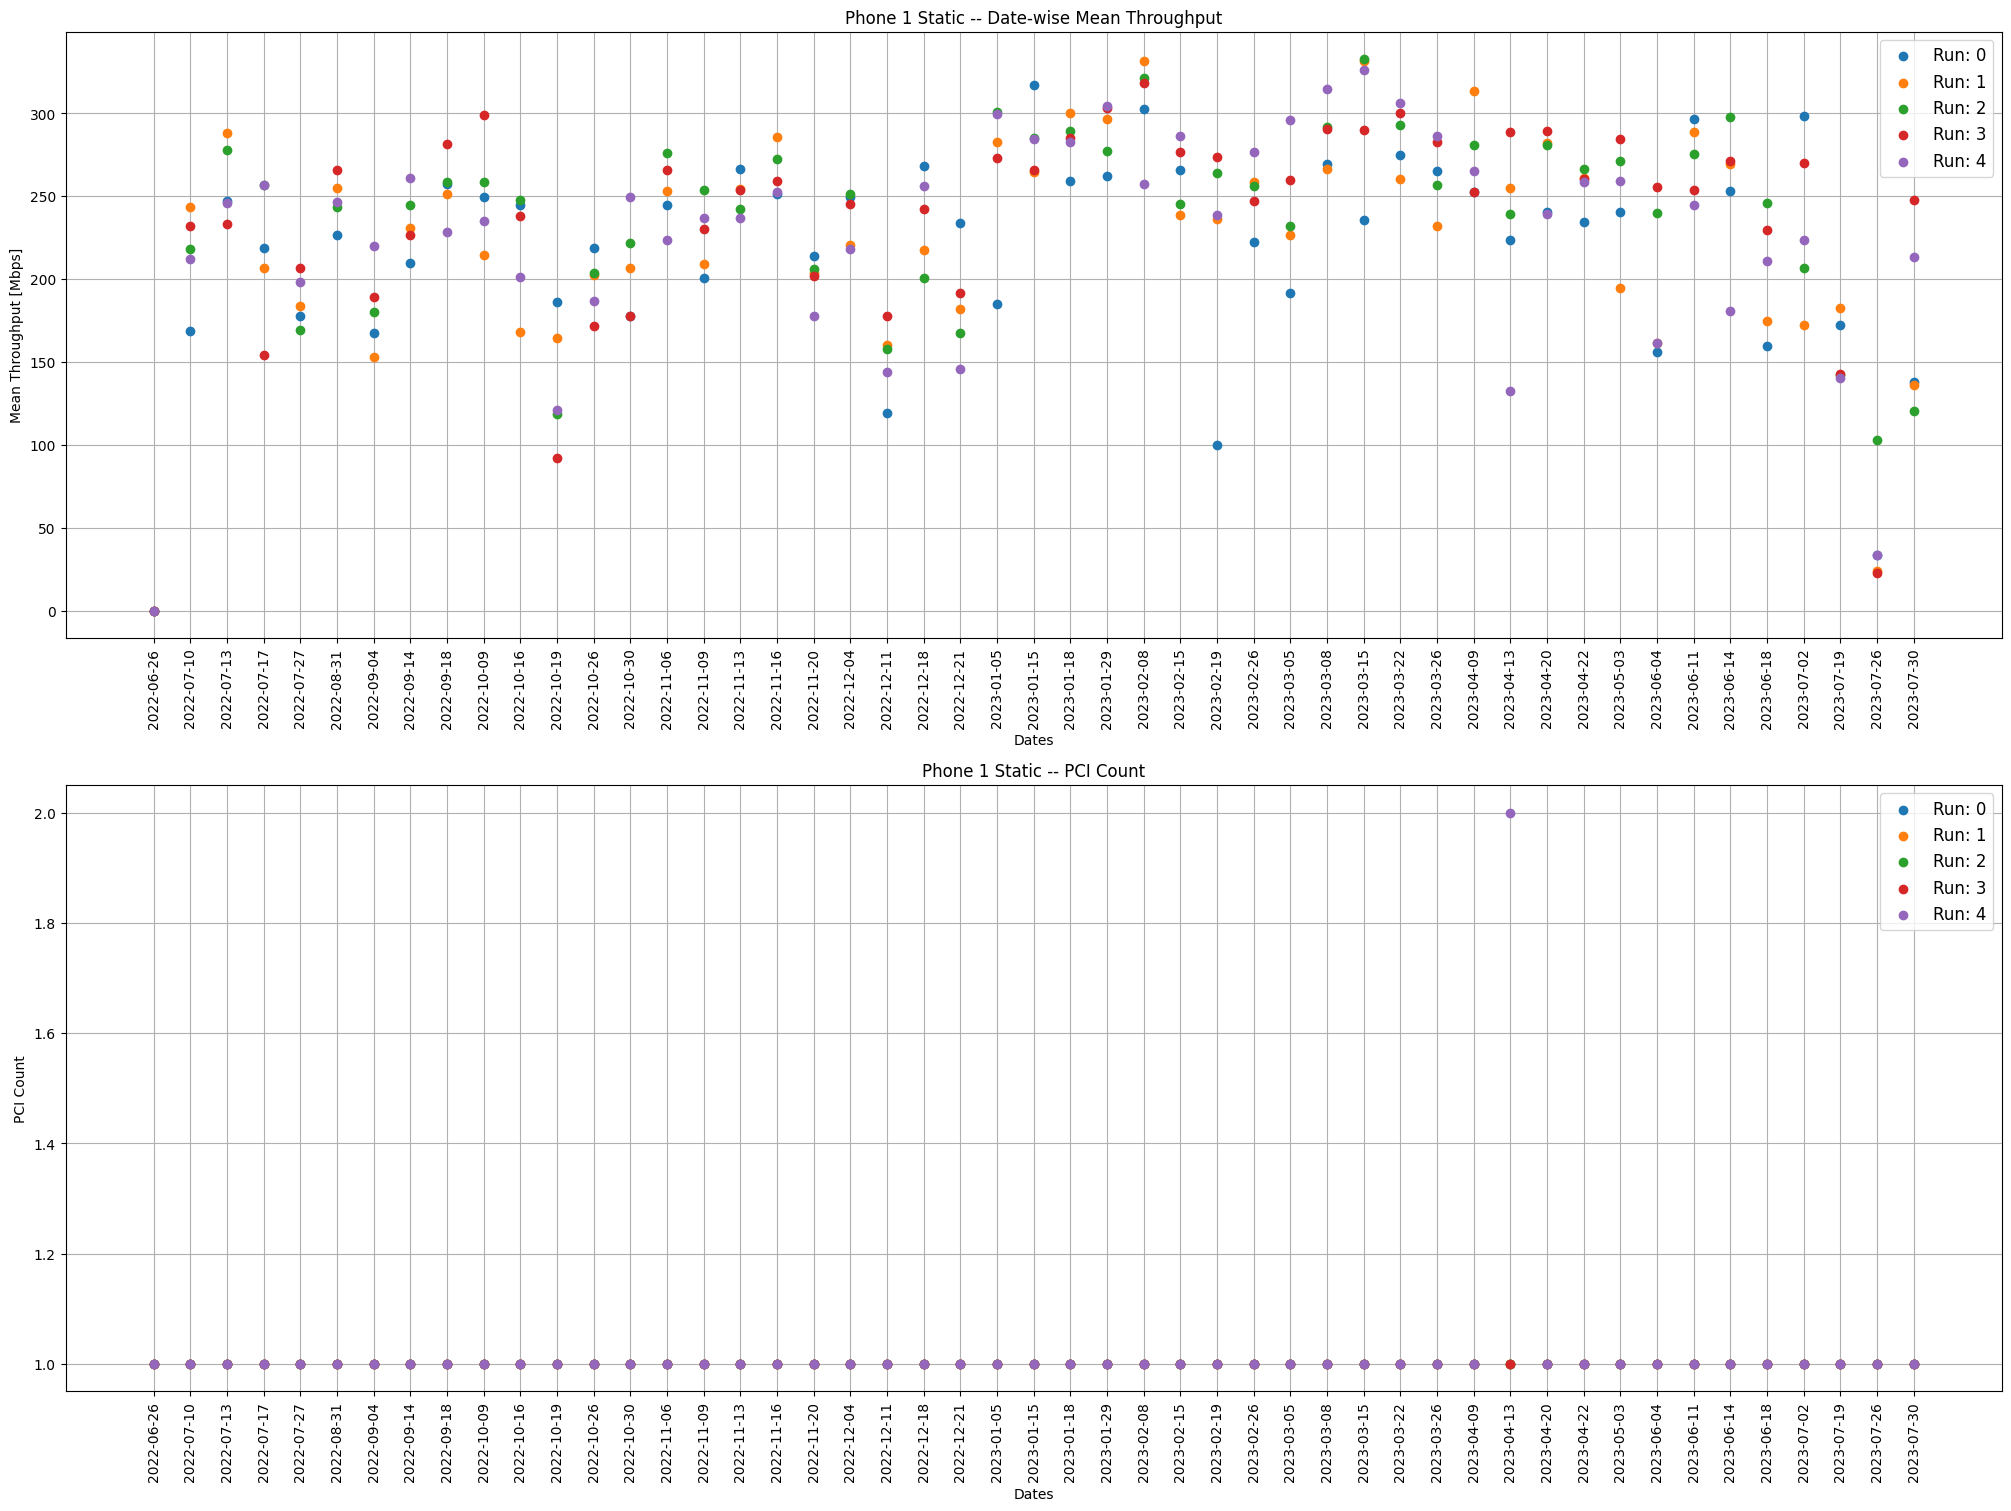

In [44]:
GeneratePCIThroughput("Phone1Static.csv", "Phone 1 Static")

/tmp/ipykernel_1007188/1459905543.py:25: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b = True)
/tmp/ipykernel_1007188/1459905543.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(dfExp["TIME_STAMP"], rotation=90)
/tmp/ipykernel_1007188/1459905543.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(dfExp["TIME_STAMP"], rotation=90)
/tmp/ipykernel_1007188/1459905543.py:46: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b = True)


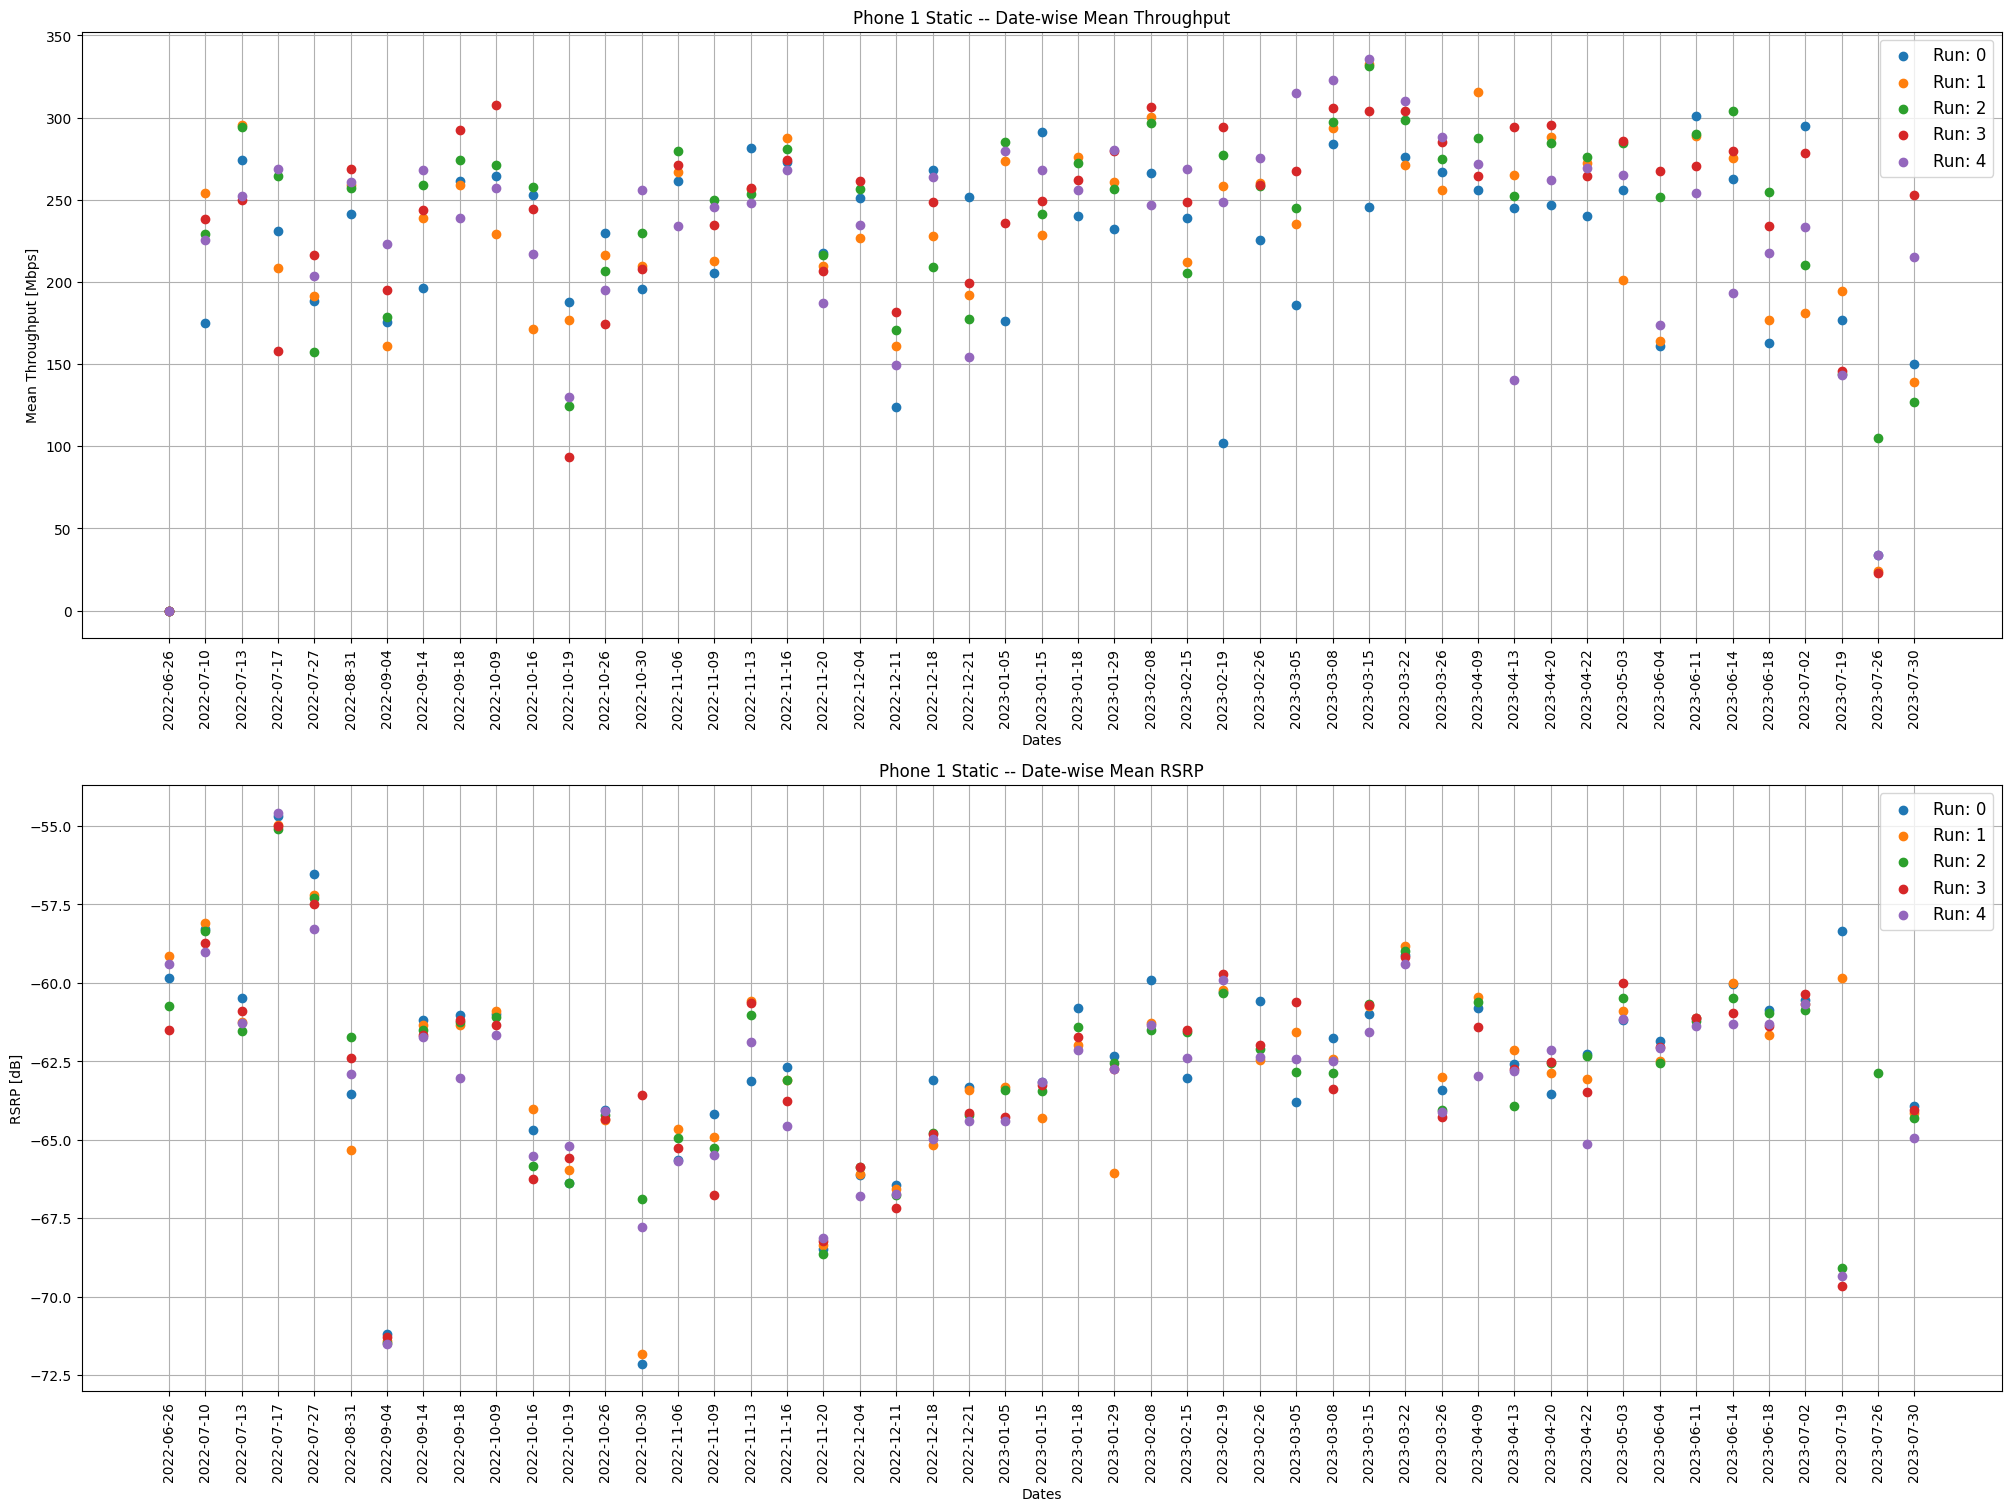

In [19]:
# GenerateGraphThroughputScatter("Phone1Static.csv", "Phone 1 Static")
GenerateGraphThroughputScatterRSRP("Phone1Static.csv", "Phone 1 Static")

/tmp/ipykernel_1007188/2352173231.py:25: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b = True)
/tmp/ipykernel_1007188/2352173231.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(dfExp["TIME_STAMP"], rotation=90)
/tmp/ipykernel_1007188/2352173231.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(dfExp["TIME_STAMP"], rotation=90)
/tmp/ipykernel_1007188/2352173231.py:47: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b = True)


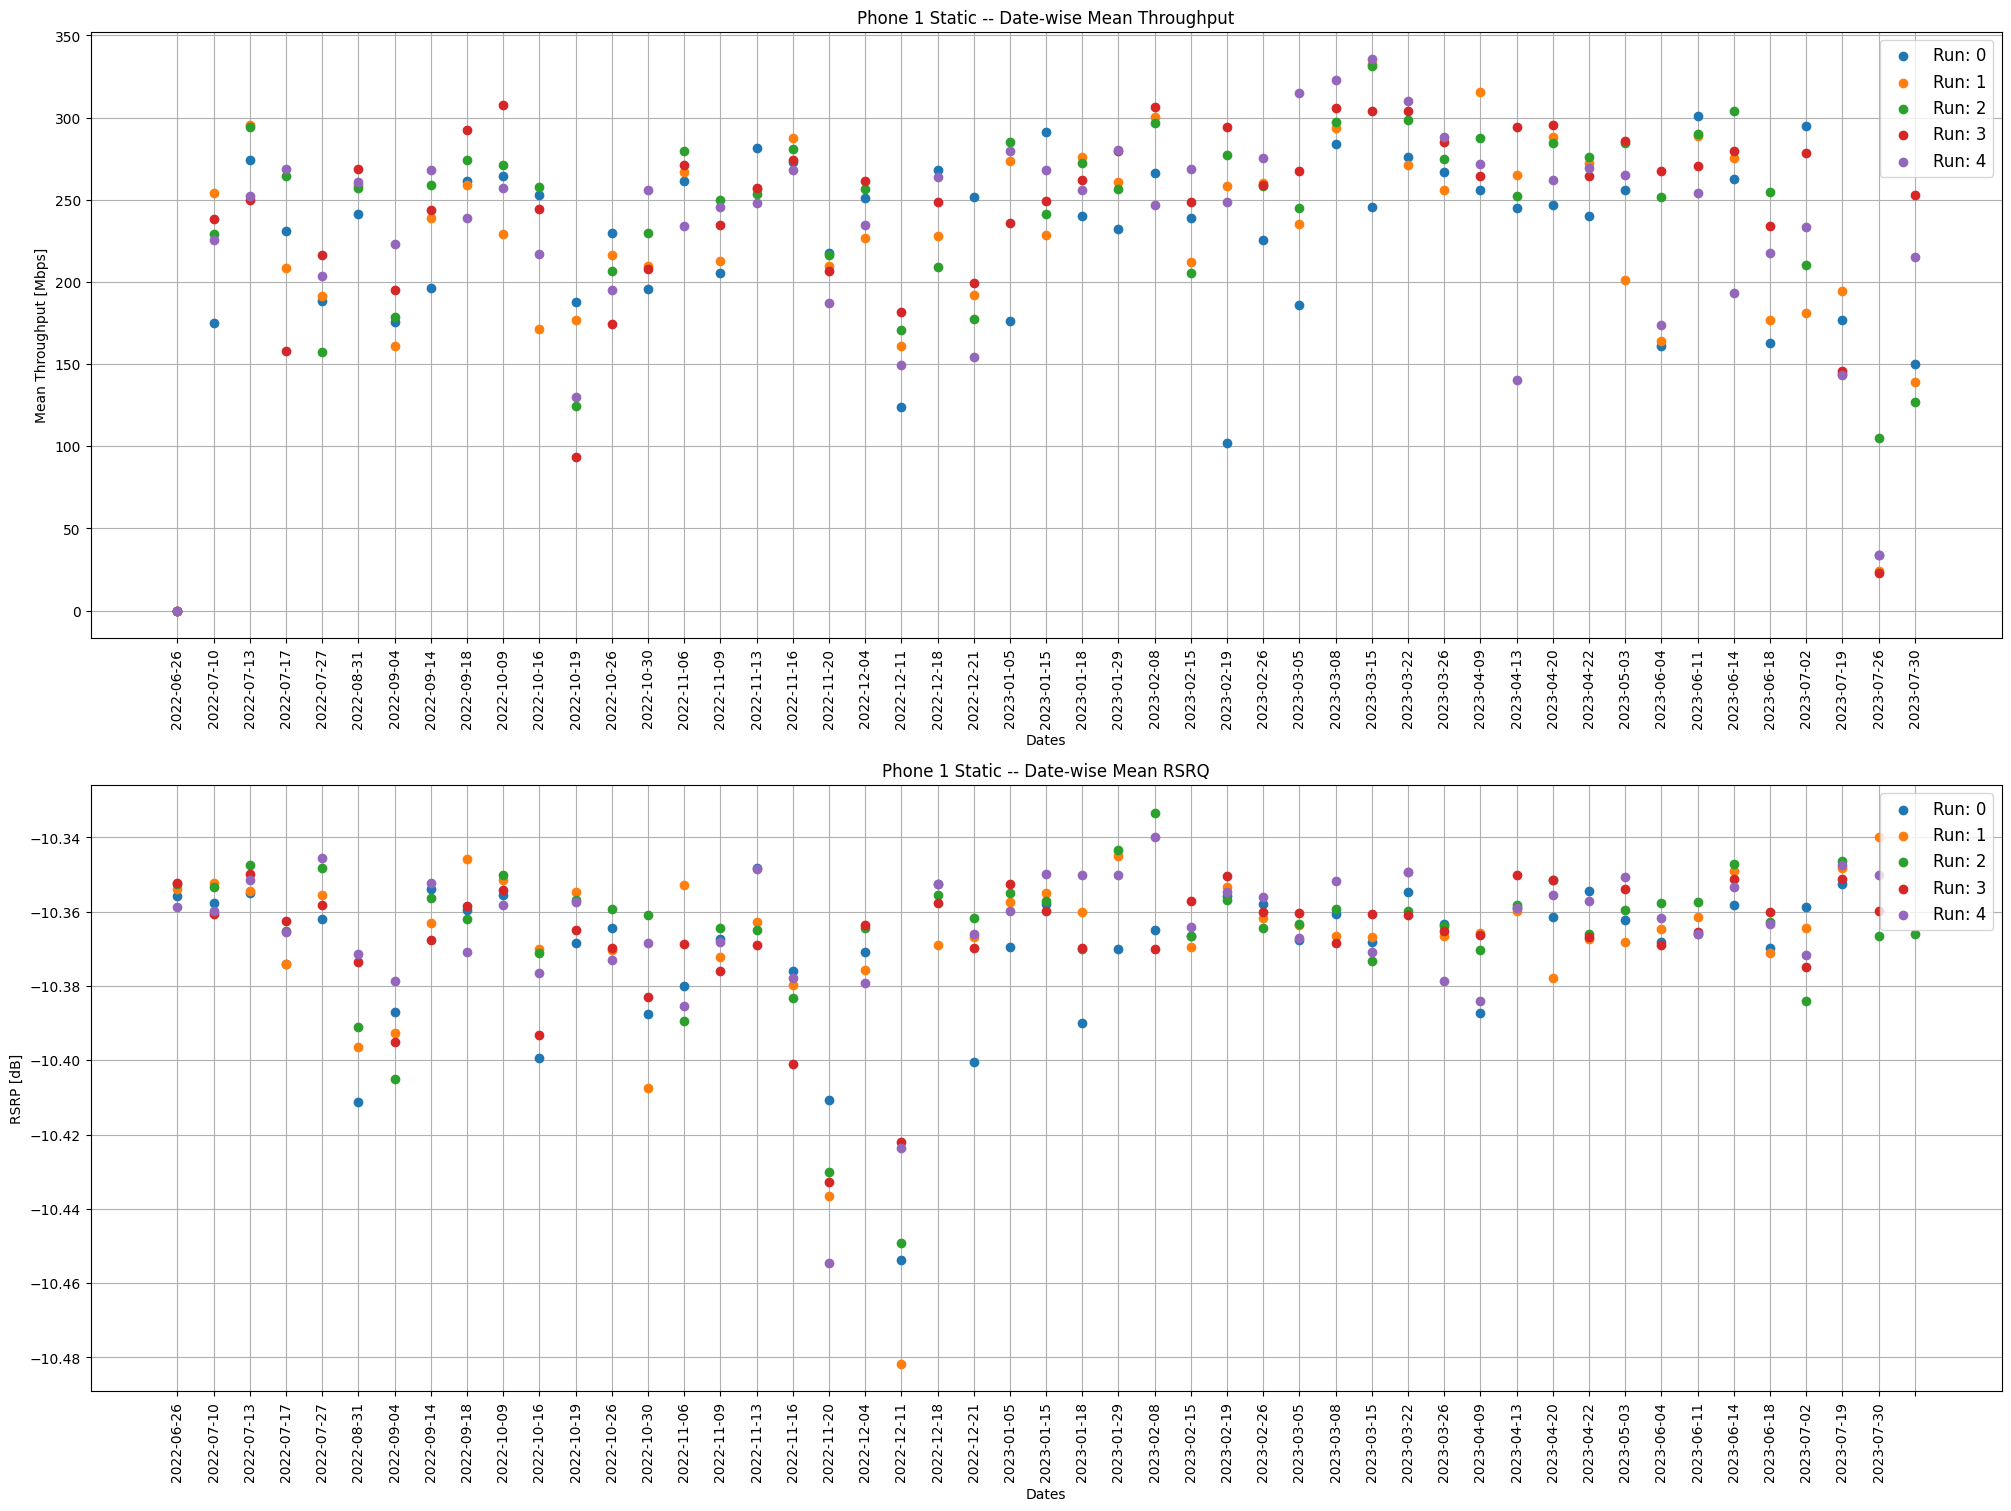

In [20]:
GenerateGraphThroughputScatterRSRQ("Phone1Static.csv", "Phone 1 Static")

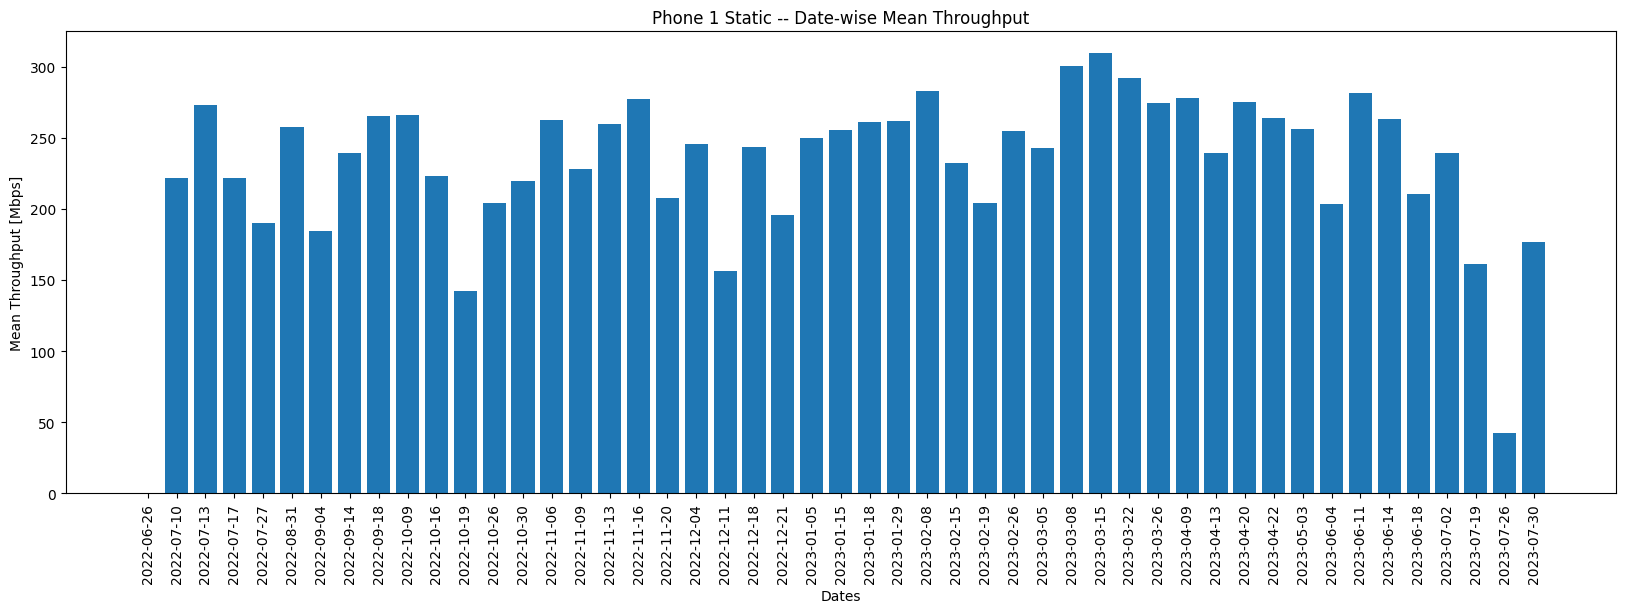

In [75]:
GenerateGraphThroughput("Phone1Static.csv", "Phone 1 Static")

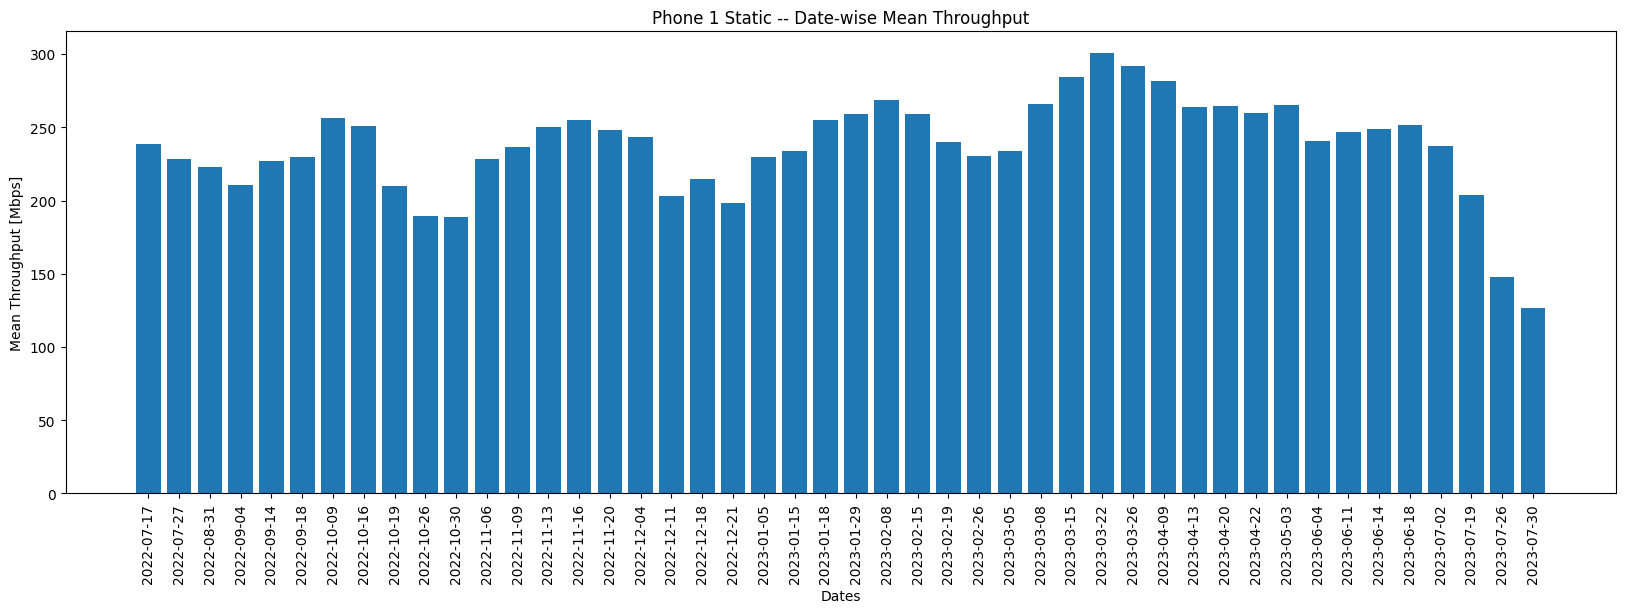

In [30]:
GenerateGraphThroughputSmooth("Phone1Static.csv", "Phone 1 Static")